# Package and Data Initialization





In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn
!pip install dask distributed --upgrade

#run, restart run time, run again

In [ ]:
pip install azureml-train-automl

In [ ]:
import sklearn
!pip install --upgrade scikit-learn
!pip show scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)
Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, threadpoolctl, numpy, joblib
Required-by: yellowbrick, textgenrnn, smac, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn, fancyimpute, auto-sklearn


In [221]:
import numpy as np
import pandas as pd
import autosklearn.classification as classifier #classifier
from sklearn.model_selection import train_test_split #load
from sklearn.metrics import accuracy_score #prediction

In [ ]:
## This is used to install all packages for azure auto ml, do not instal further auto ml packages
pip install -r requirements.txt
pip install azureml-contrib-fairness
pip install fairlearn==0.4.6

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mlxtend.preprocessing import standardize
from fairlearn.reductions import GridSearch, DemographicParity, ErrorRate, EqualizedOdds
from fairlearn.widget import FairlearnDashboard

In [5]:
import azureml.core
print("This notebook was created using version 1.27.0 of the Azure ML SDK")
print("You are currently using version", azureml.core.VERSION, "of the Azure ML SDK")

This notebook was created using version 1.27.0 of the Azure ML SDK
You are currently using version 1.27.0 of the Azure ML SDK


In [11]:
import os

subscription_id = os.getenv("SUBSCRIPTION_ID", default="883a227b-29ca-4936-abce-7897cd490955")
resource_group = os.getenv("RESOURCE_GROUP", default="ML_Project")
workspace_name = os.getenv("WORKSPACE_NAME", default="April_18_ML_Project")
workspace_region = os.getenv("WORKSPACE_REGION", default="East US")

In [12]:
from azureml.core import Workspace

try:
    ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
    # write the details of the workspace to a configuration file to the notebook library
    ws.write_config()
    print("Workspace configuration succeeded. Skip the workspace creation steps below")
except:
    print("Workspace not accessible. Change your parameters or create a new workspace below")

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code C8V7W9AT6 to authenticate.
You have logged in. Now let us find all the subscriptions to which you have access...
Interactive authentication successfully completed.
Workspace configuration succeeded. Skip the workspace creation steps below


In [13]:
data_raw = pd.read_csv("/content/PAKDD2010_Modeling_Data.txt", sep = '\t', encoding = 'mac_roman', header=None)
data_raw

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1


In [14]:
col_names = ["ID_CLIENT", "CLERK_TYPE", "PAYMENT_DAY", "APPLICATION_SUBMISSION_TYPE", "QUANT_ADDITIONAL_CARDS",
             "POSTAL_ADDRESS_TYPE","SEX","MARITAL_STATUS","QUANT_DEPENDANTS","EDUCATION_LEVEL","STATE_OF_BIRTH",
             "CITY_OF_BIRTH","NACIONALITY","RESIDENCIAL_STATE","RESIDENCIAL_CITY","RESIDENCIAL_BOROUGH",
             "FLAG_RESIDENCIAL_PHONE", "RESIDENCIAL_PHONE_AREA_CODE", "RESIDENCE_TYPE", "MONTHS_IN_RESIDENCE",
             "FLAG_MOBILE_PHONE","FLAG_EMAIL","PERSONAL_MONTHLY_INCOME","OTHER_INCOMES", "FLAG_VISA","FLAG_MASTERCARD",
             "FLAG_DINERS","FLAG_AMERICAN_EXPRESS","FLAG_OTHER_CARDS","QUANT_BANKING_ACCOUNTS","QUANT_SPECIAL_BANKING_ACCOUNTS",
             "PERSONAL_ASSETS_VALUE","QUANT_CARS","COMPANY","PROFESSIONAL_STATE","PROFESSIONAL_CITY","PROFESSIONAL_BOROUGH",
             "FLAG_PROFESSIONAL_PHONE","PROFESSIONAL_PHONE_AREA_CODE","MONTHS_IN_THE_JOB","PROFESSION_CODE","OCCUPATION_TYPE",
             "MATE_PROFESSION_CODE","MATE_EDUCATION_LEVEL","FLAG_HOME_ADDRESS_DOCUMENT","FLAG_RG","FLAG_CPF","FLAG_INCOME_PROOF",
             "PRODUCT","FLAG_ACSP_RECORD", "AGE", "RESIDENCIAL_ZIP_3","PROFESSIONAL_ZIP_3", "TARGET_LABEL"]

In [15]:
data_raw.columns = col_names
data_raw

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1


# 1) Variables with known NaN's

In [16]:
#Checking which columns contain "NaN" values
col_with_nan = []
for col in data_raw:
  if data_raw[col].isnull().values.any():
    col_with_nan.append(col)

In [17]:
col_with_nan

['RESIDENCE_TYPE',
 'MONTHS_IN_RESIDENCE',
 'PROFESSIONAL_CITY',
 'PROFESSIONAL_BOROUGH',
 'PROFESSION_CODE',
 'OCCUPATION_TYPE',
 'MATE_PROFESSION_CODE',
 'MATE_EDUCATION_LEVEL']

Another issue we are seeing here is that EDUCATION_LEVEL has no explanatory power as seen as below, so MATE_EDUCATION_LEVEL might me a good substitute for it

In [18]:
count = 0
for row in range(50000):
  if data_raw.loc[row, "EDUCATION_LEVEL"] == 0:
    count = count + 1 

In [19]:
count

50000

Let us first consider MATE_EDUCATION_LEVEL to see the number of missing values.

In [20]:
nan_count = 0
nan_idx = []
ed_level = []
for row in range(50000):
  if math.isnan(data_raw.loc[row, "MATE_EDUCATION_LEVEL"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    ed_level.append(data_raw.loc[row, "MATE_EDUCATION_LEVEL"])

In [21]:
nan_count

32338

There are a lot of missing observations, namely 32338. We need to see if we can potentially replace those observations maybe using median/mean. Let us look at the statistics of current observations.

In [22]:
np.mean(ed_level)

0.2960027176990148

In [23]:
np.median(ed_level)

0.0

In [24]:
ed_level.count(0.0)

15995

In [25]:
ed_level.count(0.0)/len(ed_level)

0.9056165779639905

We can also keep the variable if the values with different education level may be extremely significant, but we will have to make a judgement call on how to handle the missing observations. The values are close to zero, we may consider instead to drop the column altogether since we see about 90.56% of observations equal to 0.

Let us consider RESIDENCE_TYPE as a variable now

In [26]:
nan_count = 0
nan_idx = []
res_type = []
for row in range(50000):
  if math.isnan(data_raw.loc[row, "RESIDENCE_TYPE"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    res_type.append(data_raw.loc[row, "RESIDENCE_TYPE"])

In [27]:
nan_count

1349

Ideally we do not want to omit the observations as it would reduce our predictive power. As such, we will instead replace with the median value of the residence type

In [28]:
np.median(res_type)

1.0

In [29]:
print("Number of 0.0:")
print(res_type.count(0.0))
print("Number of 1.0:")
print(res_type.count(1.0))
print("Number of 2.0:")
print(res_type.count(2.0))
print("Number of 3.0:")
print(res_type.count(3.0))
print("Number of 4.0:")
print(res_type.count(4.0))
print("Number of 5.0:")
print(res_type.count(5.0))

Number of 0.0:
760
Number of 1.0:
41572
Number of 2.0:
3884
Number of 3.0:
141
Number of 4.0:
311
Number of 5.0:
1983


Let us know consider the MONTHS_IN_RESIDENCE variable

In [30]:
nan_count = 0
nan_idx = []
mir_nums = []
for row in range(50000):
  if math.isnan(data_raw.loc[row, "MONTHS_IN_RESIDENCE"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    mir_nums.append(data_raw.loc[row, "MONTHS_IN_RESIDENCE"])

In [31]:
nan_count

3777

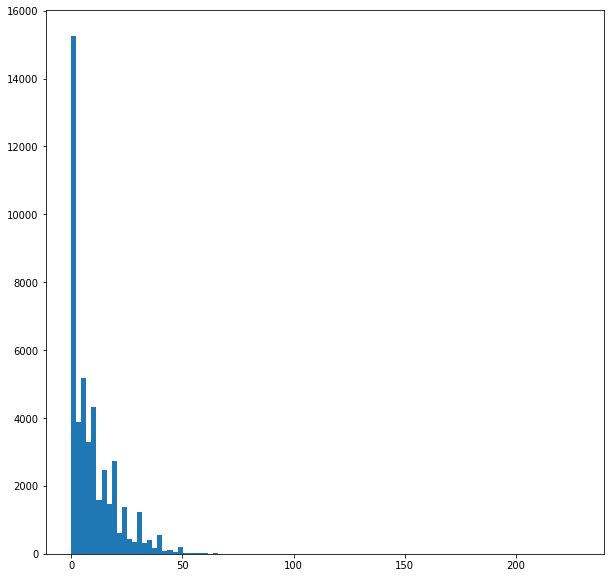

In [32]:
_ = plt.figure(figsize=(10,10))
_ = plt.hist(mir_nums, bins = 100)

We will replace the missing values by the median value as this value will be less sensitive to outliers and will be more reasonable.

We can now consider the PROFESSIONAL_CITY variable and see how we will handle NaN's in this case.

In [33]:
nan_count = 0
nan_idx = []
prof_cit = []
for row in range(50000):
  if pd.isna(data_raw.loc[row, "PROFESSIONAL_CITY"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    prof_cit.append(data_raw.loc[row, "PROFESSIONAL_CITY"])

In [34]:

nan_count

33783

With such a large amount of NaN observations, and with no potential replaceable value, it is better for us to drop the column altogether.

We can now look at PROFESSIONAL_BOROUGH which may have less NaN observations than PROFESSIONAL_CITY.

In [35]:
nan_count = 0
nan_idx = []
prof_bor = []
for row in range(50000):
  if pd.isna(data_raw.loc[row, "PROFESSIONAL_BOROUGH"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    prof_bor.append(data_raw.loc[row, "PROFESSIONAL_BOROUGH"])

In [36]:
nan_count

33783

The number of NaN is exactly the same for the PROFESSIONAL_CITY variable, and so we can simply drop the PROFESSIONAL_BOROUGH. 

Let's now consider PROFESSION_CODE and see how we will treat the NaN values

In [37]:
nan_count = 0
nan_idx = []
prof_code = []
for row in range(50000):
  if math.isnan(data_raw.loc[row, "PROFESSION_CODE"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    prof_code.append(data_raw.loc[row, "PROFESSION_CODE"])

In [38]:

nan_count

7756

The number of missing values is quite moderate, we will see first of all what is the distribution of the categories

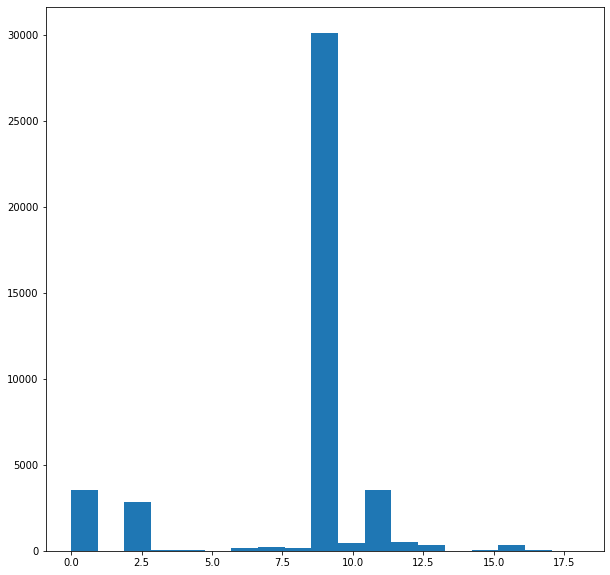

In [39]:





_ = plt.figure(figsize=(10,10))
_ = plt.hist(prof_code, bins = 19)

In [40]:
len(set(prof_code))

19


To avoid overfitting, we will likely create an indicator random variable for the most frequent category/categories.

Now let's consider the OCCUPATION_TYPE variable. We do not have a lot of information about the occupation type of the person applying, nor do we know much about how it differs from the PROFESSION_CODE

In [41]:
nan_count = 0
nan_idx = []
occ_type = []
for row in range(50000):
  if math.isnan(data_raw.loc[row, "OCCUPATION_TYPE"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    occ_type.append(data_raw.loc[row, "OCCUPATION_TYPE"])

In [42]:
nan_count

7313

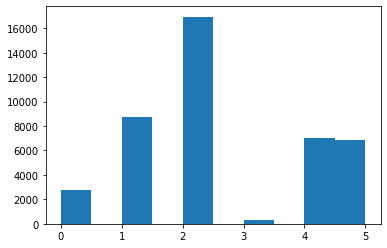

In [43]:



_ = plt.hist(occ_type)

The number of missing observations is quite close to the number of missing observations for PROFESSION_CODE. Because we believe there could be a significant amount of correlation with PROFESSION_CODE, this variable will likely not add superior explanatory power. We may consider dropping the column altogether depending on what we choose to do with the PROFESSION_CODE variable. We also do not want to extrapolate on a variable for which we have no tangible information on what it means.

Let's now evaluate the MATE_PROFESSION_CODE.

In [44]:

nan_count = 0
nan_idx = []
mate_prof_code = []
for row in range(50000):
  if math.isnan(data_raw.loc[row, "MATE_PROFESSION_CODE"]):
    nan_count = nan_count + 1
    nan_idx.append(row)
  else:
    mate_prof_code.append(data_raw.loc[row, "MATE_PROFESSION_CODE"])

In [45]:
nan_count

28884

In [46]:
len(set(mate_prof_code))

18

The number of missing observations is quite large, but we could still accommodate it by adding indicator random variables for frequent variable and leave the missing observation as being an infrequent profession code for the partner of the person who filed the application.

## 2) Variables with Bad Values

Let us consider SEX as a variable now, this variable will be critical to our analysis, as such we must deal with precaution while handling potential values that are not incorrectly inputted.

In [47]:
m_count = 0
f_count = 0
other_count = 0
other_list = []
for i in range(50000):
  if data_raw.loc[i, "SEX"] == "M":
    m_count += 1
  elif data_raw.loc[i, "SEX"] == "F":
    f_count += 1
  else:
    other_count += 1
    other_list.append(data_raw.loc[i,"SEX"])

In [48]:



#NUMBER OF MALES
m_count

19130

In [49]:
#NUMBER OF FEMALES
f_count

30805

In [50]:
#NUMBER OF OTHER SEXES
other_count

65

In [51]:
#LIST OF INPUTS IN THE OTHER SEXES
other_list

['N',
 ' ',
 'N',
 'N',
 'N',
 ' ',
 'N',
 'N',
 'N',
 ' ',
 'N',
 'N',
 'N',
 'N',
 ' ',
 'N',
 ' ',
 'N',
 ' ',
 'N',
 ' ',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 ' ',
 'N',
 ' ',
 'N',
 'N',
 'N',
 'N',
 ' ',
 ' ',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 ' ',
 ' ',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 ' ',
 'N',
 ' ',
 'N',
 'N',
 ' ',
 'N',
 'N',
 ' ',
 'N',
 'N']

We see that there are about 65 observations that have "N" or " " as their inputs, which likely point towards values that have been incorrectly inputted. We do not want to replace those observations towards Male or Female, and as such we can safely drop those 65 observations.

# 3) Cleaning

In [52]:
data_nans_fixed = pd.DataFrame(data_raw)
other_nan_values = []
for row in range(len(data_nans_fixed)):
    for col in data_nans_fixed.columns:
        if pd.isnull(data_nans_fixed.loc[row, col]):
            other_nan_values.append(data_nans_fixed.loc[row, col])
            data_nans_fixed.loc[row, col] = float('nan')
        if data_nans_fixed.loc[row, col] == ' ':
            data_nans_fixed.loc[row, col] = float('nan')
for row in range(len(data_nans_fixed)):
    if data_nans_fixed.loc[row, 'SEX'] == 'N':
        data_nans_fixed.loc[row, 'SEX'] = float('nan')

In [53]:
#data_clean = pd.DataFrame(data_raw)
#data_clean
data_nans_fixed

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,NaN,NaN,NaN,N,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,NaN,NaN,NaN,N,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,NaN,NaN,NaN,N,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,NaN,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,NaN,NaN,NaN,N,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,NaN,NaN,NaN,N,NaN,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1


In [54]:

#MONTHS_IN_RESIDENCE
mir_med = np.median(mir_nums)
data_nans_fixed["MONTHS_IN_RESIDENCE"] = data_nans_fixed["MONTHS_IN_RESIDENCE"].replace(np.nan, mir_med)
data_nans_fixed["MONTHS_IN_RESIDENCE"]

0        15.0
1         1.0
2         6.0
3         6.0
4        12.0
         ... 
49995    14.0
49996    15.0
49997     5.0
49998     6.0
49999     9.0
Name: MONTHS_IN_RESIDENCE, Length: 50000, dtype: float64

In [55]:
#COMPANY
data_nans_fixed["COMPANY"] = data_nans_fixed["COMPANY"].replace("N", 0)
data_nans_fixed["COMPANY"] = data_nans_fixed["COMPANY"].replace("Y", 1)
data_nans_fixed["COMPANY"]

0        0
1        1
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    1
49999    1
Name: COMPANY, Length: 50000, dtype: int64

In [56]:
#PRODUCT
set(data_nans_fixed["PRODUCT"])

{1, 2, 7}

In [57]:
prod_list = list(data_nans_fixed["PRODUCT"])
list_prod_one = [1 if x==1 else 0 for x in prod_list]
list_prod_two = [1 if x==2 else 0 for x in prod_list]
list_prod_seven = [1 if x==7 else 0 for x in prod_list]

In [58]:
data_nans_fixed["PRODUCT_1"] = pd.Series(list_prod_one)
data_nans_fixed["PRODUCT_2"] = pd.Series(list_prod_two)
data_nans_fixed["PRODUCT_7"] = pd.Series(list_prod_seven)
data_nans_fixed

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,N,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1,1,0,0
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,1,NaN,NaN,NaN,N,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1,1,0,0
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,N,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0,1,0,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,NaN,NaN,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0,1,0,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,N,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,0,NaN,NaN,NaN,N,NaN,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1,1,0,0
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0,0,1,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,1,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0,1,0,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,6.0,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,1,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1,1,0,0


In [59]:
#FLAG_CREDIT_CARD
data_nans_fixed["FLAG_CREDIT_CARD"] = data_nans_fixed["FLAG_VISA"] | data_nans_fixed["FLAG_DINERS"] | data_nans_fixed["FLAG_MASTERCARD"] | data_nans_fixed["FLAG_AMERICAN_EXPRESS"] | data_nans_fixed["FLAG_OTHER_CARDS"]
data_nans_fixed["FLAG_CREDIT_CARD"]

0        1
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: FLAG_CREDIT_CARD, Length: 50000, dtype: int64

In [60]:
#checking for invalid values of FLAG_PROFESSIONAL_PHONE
count_prof_phone_nan = 0
for row in range(len(data_nans_fixed)):
    if data_nans_fixed.loc[row, 'FLAG_PROFESSIONAL_PHONE'] not in ['N','Y']:
        data_nans_fixed.loc[row, 'FLAG_PROFESSIONAL_PHONE'] = float('nan')
        count_prof_phone_nan += 1

In [61]:
set(data_nans_fixed["FLAG_PROFESSIONAL_PHONE"])

{'N', 'Y'}

In [62]:

#converting N,Y to 0,1 for FLAG_PROFESSIONAL PHONE
data_nans_fixed["FLAG_PROFESSIONAL_PHONE"] = data_nans_fixed["FLAG_PROFESSIONAL_PHONE"].replace("N",0)
data_nans_fixed["FLAG_PROFESSIONAL_PHONE"] = data_nans_fixed["FLAG_PROFESSIONAL_PHONE"].replace("Y",1)
data_nans_fixed["FLAG_PROFESSIONAL_PHONE"]

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    1
49999    1
Name: FLAG_PROFESSIONAL_PHONE, Length: 50000, dtype: int64

In [63]:
#converting N,Y to 0,1 for FLAG_PROFESSIONAL PHONE
data_nans_fixed["FLAG_RESIDENCIAL_PHONE"] = data_nans_fixed["FLAG_RESIDENCIAL_PHONE"].replace("N",0)
data_nans_fixed["FLAG_RESIDENCIAL_PHONE"] = data_nans_fixed["FLAG_RESIDENCIAL_PHONE"].replace("Y",1)
data_nans_fixed["FLAG_RESIDENCIAL_PHONE"]

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    0
Name: FLAG_RESIDENCIAL_PHONE, Length: 50000, dtype: int64

In [64]:

#checking for invalid values of FLAG_MOBILE_PHONE
count_mob_phone_Y = 0
for row in range(len(data_nans_fixed)):
    if data_nans_fixed.loc[row, 'FLAG_MOBILE_PHONE'] != 'N':
        count_mob_phone_Y += 1

In [65]:
count_mob_phone_Y

0

In [66]:
data_nans_fixed['TOTAL_INCOME'] = data_nans_fixed['PERSONAL_MONTHLY_INCOME'] + data_nans_fixed['OTHER_INCOMES']
data_nans_fixed['TOTAL_INCOME_STD'] = standardize(data_nans_fixed['TOTAL_INCOME'])

/usr/local/lib/python3.7/dist-packages/mlxtend/preprocessing/scaling.py:107: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [67]:

data_nans_fixed["TOTAL_INCOME"]

0         900.00
1         750.00
2         500.00
3         500.00
4        1200.00
          ...   
49995    1451.00
49996     450.00
49997    1555.00
49998    1443.27
49999     719.38
Name: TOTAL_INCOME, Length: 50000, dtype: float64

In [68]:
data_nans_fixed["TOTAL_INCOME_STD"]

0       -0.002800
1       -0.021794
2       -0.053450
3       -0.053450
4        0.035187
           ...   
49995    0.066970
49996   -0.059781
49997    0.080139
49998    0.065991
49999   -0.025671
Name: TOTAL_INCOME_STD, Length: 50000, dtype: float64

In [69]:
res_type_prod_list = list(data_nans_fixed["RESIDENCE_TYPE"])
res_list_prod_zero = [1 if x==0 else 0 for x in res_type_prod_list]
res_list_prod_one = [1 if x==1 else 0 for x in res_type_prod_list]
res_list_prod_two = [1 if x==2 else 0 for x in res_type_prod_list]
res_list_prod_three = [1 if x==3 else 0 for x in res_type_prod_list]
res_list_prod_four = [1 if x==4 else 0 for x in res_type_prod_list]
res_list_prod_five = [1 if x==5 else 0 for x in res_type_prod_list]

In [70]:
#One-Hot encode Residence Type
data_nans_fixed["RESIDENCE_TYPE_0"] = pd.Series(res_list_prod_zero)
data_nans_fixed["RESIDENCE_TYPE_1"] = pd.Series(res_list_prod_one)
data_nans_fixed["RESIDENCE_TYPE_2"] = pd.Series(res_list_prod_two)
data_nans_fixed["RESIDENCE_TYPE_3"] = pd.Series(res_list_prod_three)
data_nans_fixed["RESIDENCE_TYPE_4"] = pd.Series(res_list_prod_four)
data_nans_fixed["RESIDENCE_TYPE_5"] = pd.Series(res_list_prod_five)
data_nans_fixed

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,1,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,1,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,1,NaN,NaN,NaN,0,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,1,105,1.0,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,0,NaN,NaN,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0,1,0,0,0,500.00,-0.053450,0,0,0,0,0,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,1,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,1,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,0,NaN,NaN,NaN,0,NaN,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,1,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,1,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,1,SP,GUARULHOS,ITAPEGICA,1,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,1,29,1.0,6.0,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,1,MG,BETIM,JARDIM ALTEROSA,1,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0


In [71]:
payday_prod_list = list(data_nans_fixed["PAYMENT_DAY"])
payday_prod_one = [1 if x==1 else 0 for x in payday_prod_list]
payday_prod_five = [1 if x==5 else 0 for x in payday_prod_list]
payday_prod_ten = [1 if x==10 else 0 for x in payday_prod_list]
payday_prod_fifteen = [1 if x==15 else 0 for x in payday_prod_list]
payday_prod_twenty = [1 if x==20 else 0 for x in payday_prod_list]
payday_prod_twentyfive = [1 if x==25 else 0 for x in payday_prod_list]

In [72]:
#One-Hot Encode Payment Day
data_nans_fixed["PAYMENT_DAY_1"] = pd.Series(payday_prod_one)
data_nans_fixed["PAYMENT_DAY_5"] = pd.Series(payday_prod_five)
data_nans_fixed["PAYMENT_DAY_10"] = pd.Series(payday_prod_ten)
data_nans_fixed["PAYMENT_DAY_15"] = pd.Series(payday_prod_fifteen)
data_nans_fixed["PAYMENT_DAY_20"] = pd.Series(payday_prod_twenty)
data_nans_fixed["PAYMENT_DAY_25"] = pd.Series(payday_prod_twentyfive)
data_nans_fixed

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,1,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,1,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,1,NaN,NaN,NaN,0,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,1,105,1.0,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,0,NaN,NaN,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0,1,0,0,0,500.00,-0.053450,0,0,0,0,0,0,0,0,0,0,1,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,1,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,1,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,0,NaN,NaN,NaN,0,NaN,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,1,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,1,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,1,SP,GUARULHOS,ITAPEGICA,1,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,1,29,1.0,6.0,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,1,MG,BETIM,JARDIM ALTEROSA,1,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0


In [73]:
#Encode Postal Address Type (1 --> 1, 2 --> 0)
data_nans_fixed["POSTAL_ADDRESS_TYPE"] = data_nans_fixed["POSTAL_ADDRESS_TYPE"].replace(2,0)
data_nans_fixed["POSTAL_ADDRESS_TYPE"]

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: POSTAL_ADDRESS_TYPE, Length: 50000, dtype: int64

In [74]:

#Encode SEX (F --> 1, M --> 0)
data_nans_fixed["SEX"] = data_nans_fixed["SEX"].replace("M",int(0))
data_nans_fixed["SEX"] = data_nans_fixed["SEX"].replace("F",int(1))
data_nans_fixed["SEX"]

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
49995    1.0
49996    1.0
49997    0.0
49998    1.0
49999    1.0
Name: SEX, Length: 50000, dtype: float64

In [75]:
#Check Number of Categories for Marital Status
set(data_nans_fixed["MARITAL_STATUS"])

{0, 1, 2, 3, 4, 5, 6, 7}

In [76]:

marital_prod_list = list(data_nans_fixed["MARITAL_STATUS"])
marital_prod_one = [1 if x== 1 else 0 for x in marital_prod_list]
marital_prod_two = [1 if x== 2 else 0 for x in marital_prod_list]
marital_prod_three = [1 if x== 3 else 0 for x in marital_prod_list]
marital_prod_four= [1 if x== 4 else 0 for x in marital_prod_list]
marital_prod_five = [1 if x== 5 else 0 for x in marital_prod_list]
marital_prod_six = [1 if x== 6 else 0 for x in marital_prod_list]
marital_prod_seven = [1 if x== 7 else 0 for x in marital_prod_list]

In [77]:

data_nans_fixed["MARITAL_STATUS_1"] = pd.Series(marital_prod_one)
data_nans_fixed["MARITAL_STATUS_2"] = pd.Series(marital_prod_two)
data_nans_fixed["MARITAL_STATUS_3"] = pd.Series(marital_prod_three)
data_nans_fixed["MARITAL_STATUS_4"] = pd.Series(marital_prod_four)
data_nans_fixed["MARITAL_STATUS_5"] = pd.Series(marital_prod_five)
data_nans_fixed["MARITAL_STATUS_6"] = pd.Series(marital_prod_six)
data_nans_fixed["MARITAL_STATUS_7"] = pd.Series(marital_prod_seven)

In [78]:
data_nans_fixed

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7
0,1,C,5,Web,0,1,1.0,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,1,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2,C,15,Carga,0,1,1.0,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,1,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,1,NaN,NaN,NaN,0,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,3,C,5,Web,0,1,1.0,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,1,105,1.0,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,4,C,20,Web,0,1,1.0,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,0,NaN,NaN,6.0,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0,1,0,0,0,500.00,-0.053450,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,5,C,10,Web,0,1,0.0,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,1,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,1.0,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,1,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,0,NaN,NaN,NaN,0,NaN,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
49996,49997,C,25,0,0,1,1.0,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,1,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
49997,49998,C,5,Web,0,1,0.0,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,1,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,1,SP,GUARULHOS,ITAPEGICA,1,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
49998,49999,C,1,Web,0,1,1.0,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,1,29,1.0,6.0,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,1,MG,BETIM,JARDIM ALTEROSA,1,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [79]:

#Finding Lowest AGE values --> will drop 3 values: 6, 7, 14
np.sort(list(data_nans_fixed["AGE"]))[0:10]

array([ 6,  7, 14, 17, 17, 17, 17, 17, 17, 17])

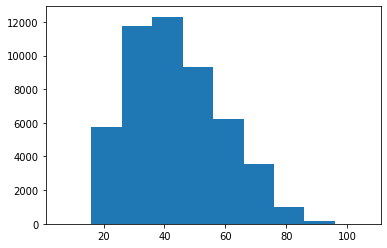

In [80]:
_ = plt.hist(data_nans_fixed["AGE"])

In [179]:
data_nans_fixed.AGE.median()

41.0

In [81]:
age_list = list(data_nans_fixed["AGE"])
age_one = [1 if x >= 17 and x <= 25 else 0 for x in age_list]
age_two = [1 if x > 25 and x <= 35 else 0 for x in age_list]
age_three = [1 if x > 35 and x <= 45 else 0 for x in age_list]
age_four= [1 if x > 45 and x <= 55 else 0 for x in age_list]
age_five = [1 if x > 55 and x <= 75 else 0 for x in age_list]
age_six = [1 if x > 75 else 0 for x in age_list]

In [82]:
data_nans_fixed["AGE_17_25"] = pd.Series(age_one)
data_nans_fixed["AGE_26_35"] = pd.Series(age_two)
data_nans_fixed["AGE_36_45"] = pd.Series(age_three)
data_nans_fixed["AGE_46_55"] = pd.Series(age_four)
data_nans_fixed["AGE_56_75"] = pd.Series(age_five)
data_nans_fixed["AGE_76_PLUS"] = pd.Series(age_six)

# Dropping NaNs

In [83]:
col_with_nan = []
for col in data_nans_fixed:
  if data_nans_fixed[col].isnull().values.any():
    col_with_nan.append(col)

In [84]:
col_with_nan

['SEX',
 'STATE_OF_BIRTH',
 'CITY_OF_BIRTH',
 'RESIDENCIAL_BOROUGH',
 'RESIDENCIAL_PHONE_AREA_CODE',
 'RESIDENCE_TYPE',
 'PROFESSIONAL_STATE',
 'PROFESSIONAL_CITY',
 'PROFESSIONAL_BOROUGH',
 'PROFESSIONAL_PHONE_AREA_CODE',
 'PROFESSION_CODE',
 'OCCUPATION_TYPE',
 'MATE_PROFESSION_CODE',
 'MATE_EDUCATION_LEVEL']

In [85]:
#SEX - 65 Observation Dropped
data_nans_dropped = pd.DataFrame(data_nans_fixed)
data_nans_dropped = data_nans_dropped.dropna(axis = 0, subset = ["SEX"])
data_nans_dropped["SEX"] = data_nans_dropped["SEX"].astype('int')

In [86]:
#EDUCATION_LEVEL - No explanatory Power (ALL Zeroes)
#MATE_EDUCATION_LEVEL - 32,000 Missing Observations
data_nans_dropped = data_nans_dropped.drop(labels = ["EDUCATION_LEVEL", "MATE_EDUCATION_LEVEL"], axis = 1)

In [87]:
data_nans_dropped = data_nans_dropped.dropna(axis = 0, subset = ["RESIDENCE_TYPE"])

In [88]:
#Drop RESIDENCE_TYPE (Since we one-hot encoded it)
data_nans_dropped = data_nans_dropped.drop(labels = ["RESIDENCE_TYPE"], axis = 1)

In [89]:
#Check Missing Observations in Application Submission Type
sum([x == '0' for x in data_nans_dropped["APPLICATION_SUBMISSION_TYPE"]])

19244

In [90]:
#DROP APPLICATION_SUBMISSION_TYPE
data_nans_dropped = data_nans_dropped.drop(labels = ["APPLICATION_SUBMISSION_TYPE"], axis = 1)

In [91]:
#DROP CLERK TYPE (NO INFO)
data_nans_dropped = data_nans_dropped.drop(labels = ["CLERK_TYPE"], axis = 1)

In [92]:
set(data_nans_dropped["QUANT_ADDITIONAL_CARDS"])

{0}

In [93]:
#DROP QUANT_ADDITIONAL_CARDS (ALL ZEROES)
data_nans_dropped = data_nans_dropped.drop(labels = ["QUANT_ADDITIONAL_CARDS"], axis = 1)

In [94]:
#DROP PAYMENT_DAY (ALREADY ONE-HOT ENCODED)
data_nans_dropped = data_nans_dropped.drop(labels = ["PAYMENT_DAY"], axis = 1)

In [95]:
#Drop Observations where Marital Status = 0, only 202 observations
data_nans_dropped["MARITAL_STATUS"] = data_nans_dropped["MARITAL_STATUS"].replace(0, np.nan)
data_nans_dropped = data_nans_dropped.dropna(axis = 0, subset = ["MARITAL_STATUS"])

In [96]:
data_nans_dropped = data_nans_dropped.drop(labels = ["MARITAL_STATUS"], axis = 1)

In [97]:
#Drop Nationality as a variable (because no clear interpretation of encoding)
data_nans_dropped = data_nans_dropped.drop(labels = ["NACIONALITY"], axis = 1)

In [98]:
#Check number of NaN's in RESIDENCIAL_PHONE_AREA_CODE (7917)
sum(data_nans_dropped["RESIDENCIAL_PHONE_AREA_CODE"].isnull())

7917

In [99]:
#Drop RESIDENCIAL_PHONE_AREA_CODE
data_nans_dropped = data_nans_dropped.drop(labels = ["RESIDENCIAL_PHONE_AREA_CODE"], axis = 1)

In [100]:
#Drop Flag Mobile Phone (all N)
data_nans_dropped = data_nans_dropped.drop(labels = ["FLAG_MOBILE_PHONE"], axis = 1)

In [101]:
#Check Quant Banking Accounts and Quant Special Banking Accounts
sum(data_nans_dropped["QUANT_SPECIAL_BANKING_ACCOUNTS"] != data_nans_dropped["QUANT_BANKING_ACCOUNTS"])

0

In [102]:
#Check Quant Special Banking Accounts
data_nans_dropped = data_nans_dropped.drop(labels = ["QUANT_SPECIAL_BANKING_ACCOUNTS"], axis = 1)

In [103]:
#Count the number of observations with 0 value
sum([x == 0.0 for x in data_nans_dropped["PERSONAL_ASSETS_VALUE"]])

46022

In [104]:
#Drop Personal Assets Value
data_nans_dropped = data_nans_dropped.drop(labels = ["PERSONAL_ASSETS_VALUE"], axis = 1)

In [105]:
#Count Number of NaNs in PROFESSIONAL_STATE
sum(data_nans_dropped["PROFESSIONAL_STATE"].isnull())

33089

In [106]:
#Drop PROFESSIONAL_STATE
data_nans_dropped = data_nans_dropped.drop(labels = ["PROFESSIONAL_STATE"], axis = 1)

In [107]:
#Count Number of NaNs in PROFESSIONAL_CITY
sum(data_nans_dropped["PROFESSIONAL_CITY"].isnull())

32902

In [108]:
#Drop PROFESSIONAL_STATE
data_nans_dropped = data_nans_dropped.drop(labels = ["PROFESSIONAL_CITY"], axis = 1)

In [109]:
#Count Number of NaNs in PROFESSIONAL_BOROUGH
sum(data_nans_dropped["PROFESSIONAL_BOROUGH"].isnull())

33476

In [110]:

#Drop PROFESSIONAL_BOROUGH
data_nans_dropped = data_nans_dropped.drop(labels = ["PROFESSIONAL_BOROUGH"], axis = 1)

In [111]:

#Count NUmber of NaNs in PROFESSIONAL_PHONE_AREA_CODE
sum(data_nans_dropped["PROFESSIONAL_PHONE_AREA_CODE"].isnull())

35261

In [112]:
#Count NUmber of NaNs in PROFESSIONAL_PHONE_AREA_CODE
data_nans_dropped = data_nans_dropped.drop(labels = ["PROFESSIONAL_PHONE_AREA_CODE"], axis = 1)

In [113]:

#Count NUmber of NaNs in MATE_PROFESSION_CODE
sum(data_nans_dropped["MATE_PROFESSION_CODE"].isnull())

27596

In [114]:
#Drop MATE_PROFESSION_CODE
data_nans_dropped = data_nans_dropped.drop(labels = ["MATE_PROFESSION_CODE"], axis = 1)

In [115]:


#Count NUmber of NaNs in FLAG_HOME_ADDRESS_DOCUMENT
sum([x == 0 for x in data_nans_dropped["FLAG_HOME_ADDRESS_DOCUMENT"]])

48386

In [116]:



#Count NUmber of NaNs in FLAG_RG
sum([x == 0 for x in data_nans_dropped["FLAG_RG"]])

48386

In [117]:


#Drop FLAG_HOME_ADDRESS_DOCUMENT
data_nans_dropped = data_nans_dropped.drop(labels = ["FLAG_HOME_ADDRESS_DOCUMENT"], axis = 1)

In [118]:
#Drop FLAG_HOME_ADDRESS_DOCUMENT
data_nans_dropped = data_nans_dropped.drop(labels = ["FLAG_RG"], axis = 1)

In [119]:
#Count NUmber of NaNs in FLAG_CPF
sum([x == 0 for x in data_nans_dropped["FLAG_CPF"]])

48386

In [120]:
#Count NUmber of NaNs in FLAG_INCOME_PROOF
sum([x == 0 for x in data_nans_dropped["FLAG_INCOME_PROOF"]])

48386

In [121]:
#Drop FLAG_CPF
data_nans_dropped = data_nans_dropped.drop(labels = ["FLAG_CPF"], axis = 1)

In [122]:
#Drop FLAG_INCOME_PROOF
data_nans_dropped = data_nans_dropped.drop(labels = ["FLAG_INCOME_PROOF"], axis = 1)

In [123]:
#Count Number of NaNs in FLAG_ACSP_RECORD
sum([x == 'N' for x in data_nans_dropped["FLAG_ACSP_RECORD"]])

48386

In [124]:
#Drop FLAG_ACSP_RECORD
data_nans_dropped = data_nans_dropped.drop(labels = ["FLAG_ACSP_RECORD"], axis = 1)

In [125]:
#Drop Low Age Values (6, 7, 14)
data_nans_dropped["AGE"] = data_nans_dropped["AGE"].replace(6, np.nan)
data_nans_dropped["AGE"] = data_nans_dropped["AGE"].replace(7, np.nan)
data_nans_dropped["AGE"] = data_nans_dropped["AGE"].replace(14, np.nan)
data_nans_dropped = data_nans_dropped.dropna(axis = 0, subset = ["AGE"])

In [126]:
#Drop Product
data_nans_dropped = data_nans_dropped.drop(labels = ["PRODUCT"], axis = 1)

In [127]:
data_clean = pd.DataFrame(data_nans_dropped)
data_clean

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS
0,1,1,1,1,RN,Assu,RN,Santana do Matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,1,1,0,RJ,rio de janeiro,RJ,RIO DE JANEIRO,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,3,1,1,0,RN,GARANHUNS,RN,Parnamirim,Boa Esperanca,1,6.0,1,500.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,NaN,27.0,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,Rio de Janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,ALFENAS,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,1,2,RN,NATAL,RN,NATAL,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
49996,49997,1,1,0,SP,LENCOIS PAULISTA,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,1,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,21.0,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
49997,49998,1,0,3,PR,RIO BONITO,SP,GUARULHOS,jardim vida nova,1,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,41.0,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
49998,49999,1,1,1,SP,SAO PAULO,MG,CONTAGEM,VILA BELEM,1,6.0,1,1443.27,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,28.0,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### Handling of Categorical Variables

In [128]:
data_cat_clean = data_clean.copy()
data_cat_clean["RESIDENCIAL_CITY"] = data_cat_clean["RESIDENCIAL_CITY"].apply(lambda x: x.lower())
data_cat_clean

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS
0,1,1,1,1,RN,Assu,RN,santana do matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,1,1,0,RJ,rio de janeiro,RJ,rio de janeiro,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,3,1,1,0,RN,GARANHUNS,RN,parnamirim,Boa Esperanca,1,6.0,1,500.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,NaN,27.0,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,rio de janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,alfenas,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,1,2,RN,NATAL,RN,natal,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
49996,49997,1,1,0,SP,LENCOIS PAULISTA,SP,lencois paulista,Nucleo Habitacional Joao Zillo,1,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,21.0,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
49997,49998,1,0,3,PR,RIO BONITO,SP,guarulhos,jardim vida nova,1,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,41.0,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
49998,49999,1,1,1,SP,SAO PAULO,MG,contagem,VILA BELEM,1,6.0,1,1443.27,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,28.0,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [129]:
data_cat_bad = pd.DataFrame(data_cat_clean[data_cat_clean["TARGET_LABEL"]== 1])
data_cat_bad

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS
0,1,1,1,1,RN,Assu,RN,santana do matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,1,1,0,RJ,rio de janeiro,RJ,rio de janeiro,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,rio de janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,alfenas,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6,7,1,1,2,BA,salvador,BA,salvador,VALERIA,1,1.0,1,320.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,4.0,40.0,413,413,1,1,0,0,0,320.00,-0.076242,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,49986,1,1,1,RN,MOSSORO,RN,natal,POTENGI,1,3.0,0,350.00,367.0,0,0,0,0,0,1,1,0,0,0,9.0,2.0,37.0,591,591,1,1,0,0,0,717.00,-0.025972,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
49993,49994,1,1,0,BA,FLORESTA AZUL,BA,feira de santana,Capuchinhos,1,4.0,1,1100.00,0.0,0,1,0,0,0,1,1,0,0,0,2.0,3.0,44.0,440,440,1,1,0,0,1,1100.00,0.022525,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
49994,49995,1,1,4,RS,PORTO ALEGRE,RS,alvorada,TIJUCA,1,38.0,1,368.00,0.0,1,0,0,0,0,1,0,1,1,0,9.0,2.0,38.0,948,948,1,1,0,0,1,368.00,-0.070164,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
49995,49996,1,1,2,RN,NATAL,RN,natal,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [130]:
bad_city_dict = data_cat_bad["RESIDENCIAL_CITY"].value_counts().to_dict()

In [131]:
city_dict = data_cat_clean["RESIDENCIAL_CITY"].value_counts().to_dict()

In [132]:
city_to_pop = []
for key in city_dict.keys():
  if city_dict[key] < 100:
    city_to_pop.append(key)

In [133]:
_ = [city_dict.pop(key) for key in city_to_pop]

In [134]:
bad_city_ratio = {}
for key in bad_city_dict.keys():
  if key in city_dict.keys():
    bad_city_ratio[key] = bad_city_dict[key]/city_dict[key]

In [135]:
sort_ratios = sorted(bad_city_ratio.items(), key=lambda x: x[1], reverse=True)

In [136]:
top_idx = 10
top_ratios = sort_ratios[:top_idx]

In [137]:
top_ratios_keys = [tuple[0] for tuple in top_ratios]
top_ratios_keys

['sao vicente',
 'alfenas',
 'sao luis',
 'salvador',
 'manaus',
 'ananindeua',
 'curitiba',
 'brasilia',
 'maua',
 'campo grande']

In [138]:
def residencial_encoder(df, locations):
  df_temp = df.copy()
  city_list = list(df_temp["RESIDENCIAL_CITY"])
  for el in locations:
    el_one_hot = [1 if x == el else 0 for x in city_list]
    df_temp[el] = pd.Series(el_one_hot, index = df_temp.index)
  return df_temp

In [139]:
data_clean_res = residencial_encoder(data_cat_clean, top_ratios_keys)

In [140]:
data_clean_res

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande
0,1,1,1,1,RN,Assu,RN,santana do matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,RJ,rio de janeiro,RJ,rio de janeiro,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,RN,GARANHUNS,RN,parnamirim,Boa Esperanca,1,6.0,1,500.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,NaN,27.0,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,rio de janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,alfenas,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,1,2,RN,NATAL,RN,natal,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49996,49997,1,1,0,SP,LENCOIS PAULISTA,SP,lencois paulista,Nucleo Habitacional Joao Zillo,1,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,21.0,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49997,49998,1,0,3,PR,RIO BONITO,SP,guarulhos,jardim vida nova,1,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,41.0,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,49999,1,1,1,SP,SAO PAULO,MG,contagem,VILA BELEM,1,6.0,1,1443.27,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,28.0,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
occupation_type_list = list(data_clean_res["OCCUPATION_TYPE"])
data_clean_res["OCC_0"] = [1 if x == 0.0 else 0 for x in occupation_type_list]
data_clean_res["OCC_1"] = [1 if x == 1.0 else 0 for x in occupation_type_list]
data_clean_res["OCC_2"] = [1 if x == 2.0 else 0 for x in occupation_type_list]
data_clean_res["OCC_3"] = [1 if x == 3.0 else 0 for x in occupation_type_list]
data_clean_res["OCC_4"] = [1 if x == 4.0 else 0 for x in occupation_type_list]
data_clean_res["OCC_5"] = [1 if x == 5.0 else 0 for x in occupation_type_list]
data_clean_res

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande,OCC_0,OCC_1,OCC_2,OCC_3,OCC_4,OCC_5
0,1,1,1,1,RN,Assu,RN,santana do matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1,1,0,RJ,rio de janeiro,RJ,rio de janeiro,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1,1,0,RN,GARANHUNS,RN,parnamirim,Boa Esperanca,1,6.0,1,500.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,NaN,27.0,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,rio de janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,alfenas,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,1,2,RN,NATAL,RN,natal,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
49996,49997,1,1,0,SP,LENCOIS PAULISTA,SP,lencois paulista,Nucleo Habitacional Joao Zillo,1,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,21.0,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49997,49998,1,0,3,PR,RIO BONITO,SP,guarulhos,jardim vida nova,1,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,41.0,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49998,49999,1,1,1,SP,SAO PAULO,MG,contagem,VILA BELEM,1,6.0,1,1443.27,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,28.0,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [142]:
data_clean_final = data_clean_res.copy()
data_clean_final

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande,OCC_0,OCC_1,OCC_2,OCC_3,OCC_4,OCC_5
0,1,1,1,1,RN,Assu,RN,santana do matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1,1,0,RJ,rio de janeiro,RJ,rio de janeiro,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1,1,0,RN,GARANHUNS,RN,parnamirim,Boa Esperanca,1,6.0,1,500.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,NaN,27.0,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,rio de janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,alfenas,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,1,2,RN,NATAL,RN,natal,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
49996,49997,1,1,0,SP,LENCOIS PAULISTA,SP,lencois paulista,Nucleo Habitacional Joao Zillo,1,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,21.0,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49997,49998,1,0,3,PR,RIO BONITO,SP,guarulhos,jardim vida nova,1,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,41.0,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49998,49999,1,1,1,SP,SAO PAULO,MG,contagem,VILA BELEM,1,6.0,1,1443.27,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,28.0,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [180]:
## Combining ages into one Binary Variable for Fairlearn, with less than 45 categorized as 45
data_clean_final.Combined_Age_Bucket = 0

data_clean_final.loc[data_clean_final.AGE_17_25 ==1, 'Combined_Age_Bucket'] = 0
data_clean_final.loc[data_clean_final.AGE_26_35 ==1, 'Combined_Age_Bucket'] = 0
data_clean_final.loc[data_clean_final.AGE_36_45 ==1, 'Combined_Age_Bucket'] = 0
data_clean_final.loc[data_clean_final.AGE_46_55 ==1, 'Combined_Age_Bucket'] = 1
data_clean_final.loc[data_clean_final.AGE_56_75 ==1, 'Combined_Age_Bucket'] = 1
data_clean_final.loc[data_clean_final.AGE_76_PLUS ==1, 'Combined_Age_Bucket'] = 1

data_clean_final

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande,OCC_0,OCC_1,OCC_2,OCC_3,OCC_4,OCC_5,Age_Bucket,Combined_Age_Bucket
0,1,1,1,1,RN,Assu,RN,santana do matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26_35,0.0
1,2,1,1,0,RJ,rio de janeiro,RJ,rio de janeiro,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26_35,0.0
2,3,1,1,0,RN,GARANHUNS,RN,parnamirim,Boa Esperanca,1,6.0,1,500.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,NaN,27.0,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26_35,0.0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,rio de janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46_55,1.0
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,alfenas,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,36_45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,1,2,RN,NATAL,RN,natal,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36_45,0.0
49996,49997,1,1,0,SP,LENCOIS PAULISTA,SP,lencois paulista,Nucleo Habitacional Joao Zillo,1,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,21.0,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17_25,0.0
49997,49998,1,0,3,PR,RIO BONITO,SP,guarulhos,jardim vida nova,1,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,41.0,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,36_45,0.0
49998,49999,1,1,1,SP,SAO PAULO,MG,contagem,VILA BELEM,1,6.0,1,1443.27,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,28.0,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,26_35,0.0


#4 Modelling


In [225]:
data_clean_final

,ID_CLIENT,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,TOTAL_INCOME,TOTAL_INCOME_STD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,AGE_17_25,AGE_26_35,AGE_36_45,AGE_46_55,AGE_56_75,AGE_76_PLUS,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande,OCC_0,OCC_1,OCC_2,OCC_3,OCC_4,OCC_5,Age_Bucket,Combined_Age_Bucket
0,1,1,1,1,RN,Assu,RN,santana do matos,Centro,1,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0,0,0,9.0,4.0,32.0,595,595,1,1,0,0,1,900.00,-0.002800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26_35,0.0
1,2,1,1,0,RJ,rio de janeiro,RJ,rio de janeiro,CAMPO GRANDE,1,1.0,1,750.00,0.0,0,0,0,0,0,0,0,1,0,0,11.0,4.0,34.0,230,230,1,1,0,0,0,750.00,-0.021794,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26_35,0.0
2,3,1,1,0,RN,GARANHUNS,RN,parnamirim,Boa Esperanca,1,6.0,1,500.00,0.0,0,0,0,0,0,0,0,0,0,0,11.0,NaN,27.0,591,591,0,1,0,0,0,500.00,-0.053450,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26_35,0.0
4,5,1,0,0,RJ,RIO DE JANEIRO,RJ,rio de janeiro,Santa Cruz,1,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0,0,0,9.0,5.0,48.0,235,235,1,1,0,0,0,1200.00,0.035187,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46_55,1.0
5,6,1,0,0,MG,CARMO DO RIO CLARO,MG,alfenas,Campos Eliseos,1,4.0,1,500.00,0.0,0,0,0,0,0,1,1,1,0,0,9.0,2.0,40.0,371,371,1,0,1,0,0,500.00,-0.053450,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,36_45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1,1,2,RN,NATAL,RN,natal,PAJUCARA,1,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0,0,0,9.0,4.0,36.0,591,591,1,1,0,0,0,1451.00,0.066970,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36_45,0.0
49996,49997,1,1,0,SP,LENCOIS PAULISTA,SP,lencois paulista,Nucleo Habitacional Joao Zillo,1,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,21.0,186,186,0,0,1,0,0,450.00,-0.059781,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17_25,0.0
49997,49998,1,0,3,PR,RIO BONITO,SP,guarulhos,jardim vida nova,1,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,41.0,715,715,0,1,0,0,0,1555.00,0.080139,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,36_45,0.0
49998,49999,1,1,1,SP,SAO PAULO,MG,contagem,VILA BELEM,1,6.0,1,1443.27,0.0,0,0,0,0,0,0,0,1,1,0,9.0,2.0,28.0,320,320,1,1,0,0,0,1443.27,0.065991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,26_35,0.0


Since we were thinking about the stability of the model in case of discrimination, we would check that the level of default is more or less the same among all groups:
-Age -Sex -Marital status

Text(0.5, 1.0, 'Default= 1, No Default =0')

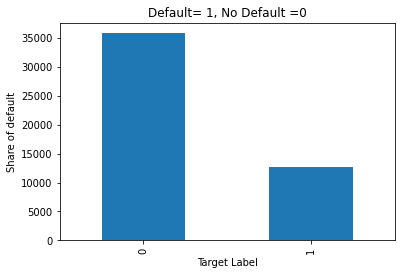

In [263]:
data_clean_final["TARGET_LABEL"].value_counts().plot(kind = "bar")
plt.ylabel("Share of default")
plt.xlabel("Target Label")
plt.title("Default= 1, No Default =0")

Text(0.5, 1.0, 'Default= 1,No Default =0')

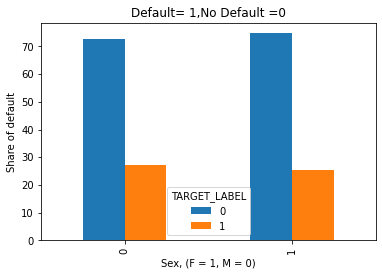

In [145]:
df_sex = pd.crosstab(data_clean_final['SEX'], data_clean_final['TARGET_LABEL'], normalize='index').mul(100)
df_sex.plot(kind="bar", title="test")
plt.ylabel("Share of default")
plt.xlabel("Sex, (F = 1, M = 0)")
plt.title("Default= 1,No Default =0")

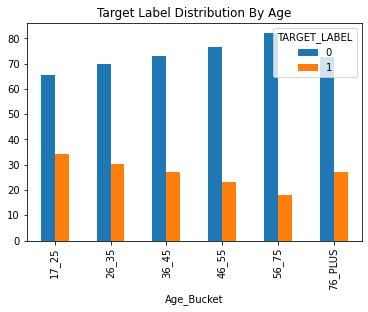

In [264]:
df_Age = pd.crosstab(data_clean_final['Age_Bucket'], data_clean_final['TARGET_LABEL'], normalize='index').mul(100)
df_Age.plot(kind="bar", title="Target Label Distribution By Age")


In [147]:
data_clean_final.columns

Index(['ID_CLIENT', 'POSTAL_ADDRESS_TYPE', 'SEX', 'QUANT_DEPENDANTS',
       'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENCIAL_STATE',
       'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_CARS', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'OCCUPATION_TYPE', 'AGE', 'RESIDENCIAL_ZIP_3',
       'PROFESSIONAL_ZIP_3', 'TARGET_LABEL', 'PRODUCT_1', 'PRODUCT_2',
       'PRODUCT_7', 'FLAG_CREDIT_CARD', 'TOTAL_INCOME', 'TOTAL_INCOME_STD',
       'RESIDENCE_TYPE_0', 'RESIDENCE_TYPE_1', 'RESIDENCE_TYPE_2',
       'RESIDENCE_TYPE_3', 'RESIDENCE_TYPE_4', 'RESIDENCE_TYPE_5',
       'PAYMENT_DAY_1', 'PAYMENT_DAY_5', 'PAYMENT_DAY_10', 'PAYMENT_DAY_15',
       'PAYMENT_DAY_20', 'PAYMENT_DAY_25', 'MARITAL_STATUS_1

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [226]:

X=data_clean_final[['MONTHS_IN_RESIDENCE', 'TOTAL_INCOME_STD', 'OTHER_INCOMES',
                      'QUANT_CARS', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'PRODUCT_1', 'PRODUCT_2',
        'PRODUCT_7', 'FLAG_CREDIT_CARD','RESIDENCE_TYPE_0', 'RESIDENCE_TYPE_1', 'RESIDENCE_TYPE_2',
       'RESIDENCE_TYPE_3', 'RESIDENCE_TYPE_4', 'RESIDENCE_TYPE_5',
       'PAYMENT_DAY_1', 'PAYMENT_DAY_5', 'PAYMENT_DAY_10', 'PAYMENT_DAY_15',
       'PAYMENT_DAY_20', 'PAYMENT_DAY_25', 'MARITAL_STATUS_1',
       'MARITAL_STATUS_2', 'MARITAL_STATUS_3', 'MARITAL_STATUS_4',
       'MARITAL_STATUS_5', 'MARITAL_STATUS_6', 'MARITAL_STATUS_7', 'sao vicente', 'alfenas', 'sao luis', 'salvador', 'manaus',
       'ananindeua', 'curitiba', 'brasilia', 'maua', 'campo grande', 'OCC_0',
       'OCC_1', 'OCC_2', 'OCC_3', 'OCC_4', 'OCC_5']]
y=data_clean_final[['TARGET_LABEL']]

In [227]:
X.dtypes

MONTHS_IN_RESIDENCE        float64
TOTAL_INCOME_STD           float64
OTHER_INCOMES              float64
QUANT_CARS                   int64
COMPANY                      int64
FLAG_PROFESSIONAL_PHONE      int64
PRODUCT_1                    int64
PRODUCT_2                    int64
PRODUCT_7                    int64
FLAG_CREDIT_CARD             int64
RESIDENCE_TYPE_0             int64
RESIDENCE_TYPE_1             int64
RESIDENCE_TYPE_2             int64
RESIDENCE_TYPE_3             int64
RESIDENCE_TYPE_4             int64
RESIDENCE_TYPE_5             int64
PAYMENT_DAY_1                int64
PAYMENT_DAY_5                int64
PAYMENT_DAY_10               int64
PAYMENT_DAY_15               int64
PAYMENT_DAY_20               int64
PAYMENT_DAY_25               int64
MARITAL_STATUS_1             int64
MARITAL_STATUS_2             int64
MARITAL_STATUS_3             int64
MARITAL_STATUS_4             int64
MARITAL_STATUS_5             int64
MARITAL_STATUS_6             int64
MARITAL_STATUS_7    

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)

In [229]:
X.isnull().sum()

MONTHS_IN_RESIDENCE        0
TOTAL_INCOME_STD           0
OTHER_INCOMES              0
QUANT_CARS                 0
COMPANY                    0
FLAG_PROFESSIONAL_PHONE    0
PRODUCT_1                  0
PRODUCT_2                  0
PRODUCT_7                  0
FLAG_CREDIT_CARD           0
RESIDENCE_TYPE_0           0
RESIDENCE_TYPE_1           0
RESIDENCE_TYPE_2           0
RESIDENCE_TYPE_3           0
RESIDENCE_TYPE_4           0
RESIDENCE_TYPE_5           0
PAYMENT_DAY_1              0
PAYMENT_DAY_5              0
PAYMENT_DAY_10             0
PAYMENT_DAY_15             0
PAYMENT_DAY_20             0
PAYMENT_DAY_25             0
MARITAL_STATUS_1           0
MARITAL_STATUS_2           0
MARITAL_STATUS_3           0
MARITAL_STATUS_4           0
MARITAL_STATUS_5           0
MARITAL_STATUS_6           0
MARITAL_STATUS_7           0
sao vicente                0
alfenas                    0
sao luis                   0
salvador                   0
manaus                     0
ananindeua    

In [153]:
y.describe()

,TARGET_LABEL
count,48383.000000
mean,0.260939
std,0.439151
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Logistic Regression


In [154]:
pip install dmba

     |████████████████████████████████| 11.8MB 11.1MB/s 


In [230]:
################################Logistic Regression###########################
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import classificationSummary, regressionSummary
from dmba import  gainsChart, liftChart

In [231]:

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,'penalty': ['l1', 'l2']}
logreg = LogisticRegression(solver='liblinear')
logreg_cv = GridSearchCV(logreg,param_grid, cv=5)

In [232]:
logreg_cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']

In [233]:

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l2'}
Best score is 0.7379532200986819


In [234]:
logreg = LogisticRegression(penalty="l2", C= 7.1e-04, max_iter=200) ## Changed L1 to L2
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
logreg_pred_train=logreg.predict_proba(X_train)

In [236]:
y_train=y_train.values.flatten()

In [237]:
logit_train = pd.DataFrame({'actual': y_train, 
                            'p(0)': [p[0] for p in logreg_pred_train],
                            'p(1)': [p[1] for p in logreg_pred_train],
                            'predicted': logreg.predict(X_train)})

Confusion Matrix (Accuracy 0.7377)

       Prediction
Actual     0     1
     0 24983     0
     1  8884     1


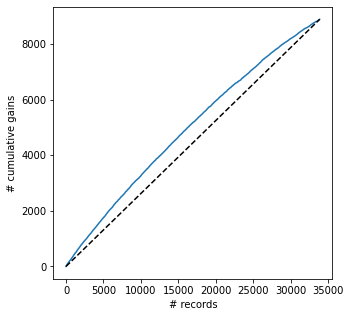

In [238]:
logit_train = logit_train.sort_values(by=['p(1)'], ascending=False)
# confusion matrix
classificationSummary(logit_train.actual, logit_train.predicted)
gainsChart(logit_train.actual, figsize=[5, 5])

In [239]:
logreg_pred_test=logreg.predict_proba(X_test)

In [240]:
y_test=y_test.values.flatten()

In [241]:
logit_test = pd.DataFrame({'actual': y_test, 
                            'p(0)': [p[0] for p in logreg_pred_test],
                            'p(1)': [p[1] for p in logreg_pred_test],
                            'predicted': logreg.predict(X_test)})

Confusion Matrix (Accuracy 0.7423)

       Prediction
Actual     0     1
     0 10775     0
     1  3740     0


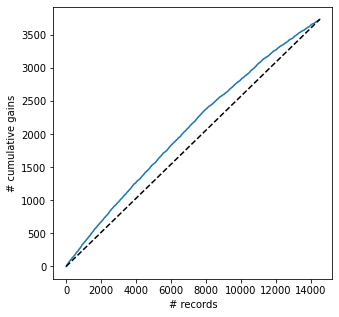

In [242]:
logit_test = logit_test.sort_values(by=['p(1)'], ascending=False)
# confusion matrix
classificationSummary(logit_test.actual, logit_test.predicted)
gainsChart(logit_test.actual, figsize=[5, 5])

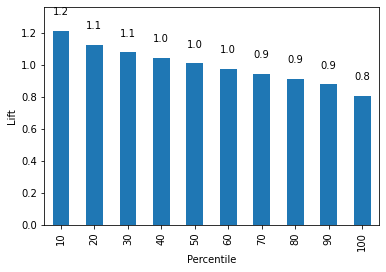

In [243]:
liftChart(logit_test['p(1)'], title=False)

In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_train,logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     24983
           1       1.00      0.00      0.00      8885

    accuracy                           0.74     33868
   macro avg       0.87      0.50      0.42     33868
weighted avg       0.81      0.74      0.63     33868



In [245]:
print(classification_report(y_test,logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10775
           1       0.00      0.00      0.00      3740

    accuracy                           0.74     14515
   macro avg       0.37      0.50      0.43     14515
weighted avg       0.55      0.74      0.63     14515



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Below we look at the classification report across sex

In [246]:
#help(pd.merge)
X_test_temp = X_test.copy()
X_test_temp["PREDICTED_y"] = logreg.predict(X_test_temp)
X_test_temp

,MONTHS_IN_RESIDENCE,TOTAL_INCOME_STD,OTHER_INCOMES,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande,OCC_0,OCC_1,OCC_2,OCC_3,OCC_4,OCC_5,PREDICTED_y
46597,0.0,-0.072443,0.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
42706,2.0,-0.028125,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18397,20.0,0.035187,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
27421,20.0,0.026908,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17390,6.0,-0.068645,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38242,1.0,0.088749,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20992,2.0,-0.064593,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5533,8.0,0.047850,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13957,2.0,-0.032833,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [248]:
X_test_temp = X_test_temp.merge(data_clean_final.loc[:,["SEX","Combined_Age_Bucket"]], left_on = X_test_temp.index, right_on = data_clean_final.index)

In [249]:
X_test_temp

,key_0,MONTHS_IN_RESIDENCE,TOTAL_INCOME_STD,OTHER_INCOMES,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande,OCC_0,OCC_1,OCC_2,OCC_3,OCC_4,OCC_5,PREDICTED_y,SEX,Combined_Age_Bucket
0,46597,0.0,-0.072443,0.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0
1,42706,2.0,-0.028125,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.0
2,18397,20.0,0.035187,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0
3,27421,20.0,0.026908,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
4,17390,6.0,-0.068645,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14510,38242,1.0,0.088749,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
14511,20992,2.0,-0.064593,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0
14512,5533,8.0,0.047850,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
14513,13957,2.0,-0.032833,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0


In [250]:
X_test_temp["y_test"] = y_test
X_test_temp

,key_0,MONTHS_IN_RESIDENCE,TOTAL_INCOME_STD,OTHER_INCOMES,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT_1,PRODUCT_2,PRODUCT_7,FLAG_CREDIT_CARD,RESIDENCE_TYPE_0,RESIDENCE_TYPE_1,RESIDENCE_TYPE_2,RESIDENCE_TYPE_3,RESIDENCE_TYPE_4,RESIDENCE_TYPE_5,PAYMENT_DAY_1,PAYMENT_DAY_5,PAYMENT_DAY_10,PAYMENT_DAY_15,PAYMENT_DAY_20,PAYMENT_DAY_25,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,sao vicente,alfenas,sao luis,salvador,manaus,ananindeua,curitiba,brasilia,maua,campo grande,OCC_0,OCC_1,OCC_2,OCC_3,OCC_4,OCC_5,PREDICTED_y,SEX,Combined_Age_Bucket,y_test
0,46597,0.0,-0.072443,0.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0
1,42706,2.0,-0.028125,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.0,1
2,18397,20.0,0.035187,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0
3,27421,20.0,0.026908,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0
4,17390,6.0,-0.068645,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14510,38242,1.0,0.088749,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0
14511,20992,2.0,-0.064593,0.0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,1
14512,5533,8.0,0.047850,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0
14513,13957,2.0,-0.032833,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0


In [251]:
X_test_f = X_test_temp[X_test_temp["SEX"] == 1]


In [252]:
print(classification_report(X_test_f["y_test"],X_test_f["PREDICTED_y"]))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6719
           1       0.00      0.00      0.00      2196

    accuracy                           0.75      8915
   macro avg       0.38      0.50      0.43      8915
weighted avg       0.57      0.75      0.65      8915



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
X_test_m = X_test_temp[X_test_temp["SEX"] == 0]


In [255]:
print(classification_report(X_test_m["y_test"],X_test_m["PREDICTED_y"]))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      4056
           1       0.00      0.00      0.00      1544

    accuracy                           0.72      5600
   macro avg       0.36      0.50      0.42      5600
weighted avg       0.52      0.72      0.61      5600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [257]:
X_test_less_than_45 = X_test_temp[X_test_temp["Combined_Age_Bucket"] == 0]
print(classification_report(X_test_less_than_45["y_test"],X_test_less_than_45["PREDICTED_y"]))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      6124
           1       0.00      0.00      0.00      2517

    accuracy                           0.71      8641
   macro avg       0.35      0.50      0.41      8641
weighted avg       0.50      0.71      0.59      8641



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [258]:
X_test_greater_than_45 = X_test_temp[X_test_temp["Combined_Age_Bucket"] == 1]
print(classification_report(X_test_greater_than_45["y_test"],X_test_greater_than_45["PREDICTED_y"]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4651
           1       0.00      0.00      0.00      1223

    accuracy                           0.79      5874
   macro avg       0.40      0.50      0.44      5874
weighted avg       0.63      0.79      0.70      5874



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fair Learn - Logistic Regression (Age and Sex) 


In [ ]:
## The following reference was used in building our Fair Learn Model
## https://github.com/Azure/MachineLearningNotebooks/blob/master/contrib/fairness/fairlearn-azureml-mitigation.ipynb

In [200]:
unmitigated_predictor = LogisticRegression(solver='liblinear', penalty="l2", C=7.1e-04)
unmitigated_predictor.fit(X_train, y_train)

LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
sweep = GridSearch(LogisticRegression(solver='liblinear', penalty="l2", C=7.1e-04), constraints=DemographicParity(), grid_size=71)
sweep.fit(X_train, y_train, sensitive_features = data_clean_final.loc[X_train.index, "SEX"])

In [202]:
predictors = sweep._predictors
predictors

[LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   

In [203]:
errors, disparities = [], []
for m in predictors:
    classifier = lambda X: m.predict(X)
    
    error = ErrorRate()
    error.load_data(X_train, pd.Series(y_train), sensitive_features= data_clean_final.loc[X_train.index, "SEX"])
    disparity = DemographicParity()
    disparity.load_data(X_train, pd.Series(y_train), sensitive_features= data_clean_final.loc[X_train.index, "SEX"])
    
    errors.append(error.gamma(classifier)[0])
    disparities.append(disparity.gamma(classifier).max())
    
all_results = pd.DataFrame( {"predictor": predictors, "error": errors, "disparity": disparities})

dominant_models_dict = dict()
base_name_format = "fairness_credit_model"
row_id = 0
for row in all_results.itertuples():
    model_name = base_name_format.format(row_id)
    errors_for_lower_or_eq_disparity = all_results["error"][all_results["disparity"]<=row.disparity]
    if row.error <= errors_for_lower_or_eq_disparity.min():
        dominant_models_dict[model_name] = row.predictor
    row_id = row_id + 1

In [204]:
predictions_dominant = {"fairness_model_unmitigated": unmitigated_predictor.predict(X_test)}
models_dominant = {"fairness_model_unmitigated": unmitigated_predictor}
for name, predictor in dominant_models_dict.items():
    value = predictor.predict(X_test)
    predictions_dominant[name] = value
    models_dominant[name] = predictor

In [207]:
FairlearnDashboard(sensitive_features = data_clean_final.loc[X_test.index, ["SEX", "Combined_Age_Bucket"]], 
                   sensitive_feature_names = ['SEX', "Combined_Age_Bucket"],
                   y_true=y_test.tolist(),
                   y_pred=predictions_dominant)

FairlearnWidget(value={'true_y': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0…

In [208]:
from azureml.core import Workspace, Experiment, Model

ws = Workspace.from_config()
ws.get_details()

INFO:azureml.core.workspace:Found the config file in: /content/.azureml/config.json
INFO:adal-python:5b37e0fd-5ac9-4487-aee0-5b7c82bb7f99 - CacheDriver:Cached token is expired at 2021-05-10 19:02:05.111867.  Refreshing
INFO:adal-python:5b37e0fd-5ac9-4487-aee0-5b7c82bb7f99 - TokenRequest:Getting a new token from a refresh token
INFO:adal-python:5b37e0fd-5ac9-4487-aee0-5b7c82bb7f99 - CacheDriver:Returning token refreshed after expiry.


{'allowPublicAccessWhenBehindVnet': False,
 'applicationInsights': '/subscriptions/883a227b-29ca-4936-abce-7897cd490955/resourcegroups/ml_project/providers/microsoft.insights/components/april18mlproje2628730236',
 'containerRegistry': '',
 'creationTime': '2021-04-20T20:46:31.8930879+00:00',
 'description': '',
 'discoveryUrl': 'https://eastus.api.azureml.ms/discovery',
 'friendlyName': 'April_18_ML_Project',
 'hbiWorkspace': False,
 'id': '/subscriptions/883a227b-29ca-4936-abce-7897cd490955/resourceGroups/ML_Project/providers/Microsoft.MachineLearningServices/workspaces/April_18_ML_Project',
 'identity': {'principal_id': '29762f7c-0709-4b65-9625-fb75f1346901',
  'tenant_id': 'add35432-773a-49c3-9db2-8d41c08e9e18',
  'type': 'SystemAssigned'},
 'imageBuildCompute': '',
 'keyVault': '/subscriptions/883a227b-29ca-4936-abce-7897cd490955/resourcegroups/ml_project/providers/microsoft.keyvault/vaults/april18mlproje3584174112',
 'location': 'eastus',
 'name': 'April_18_ML_Project',
 'notebook

In [215]:
import joblib

os.makedirs('models', exist_ok=True)
def register_model(name, model):
    print("Registering ", name)
    model_path = "models/{0}.pkl".format(name)
    joblib.dump(value=model, filename=model_path)
    registered_model = Model.register(model_path=model_path,
                                      model_name=name,
                                      workspace=ws)
    print("Registered ", registered_model.id)
    return registered_model.id

model_name_id_mapping = dict()
for name, model in models_dominant.items():
    m_id = register_model(name, model)
    model_name_id_mapping[name] = m_id

Registering  fairness_model_unmitigated
Registering model fairness_model_unmitigated
Registered  fairness_model_unmitigated:5
Registering  fairness_credit_model
Registering model fairness_credit_model
Registered  fairness_credit_model:6


In [216]:
predictions_dominant_ids = dict()
for name, y_pred in predictions_dominant.items():
    predictions_dominant_ids[model_name_id_mapping[name]] = y_pred

In [ ]:
sf = { 'sex': data_clean_final.loc[X_test.index, "SEX"],  'Combined_Age_Bucket': data_clean_final.loc[X_test.index, "Combined_Age_Bucket"]      }

from fairlearn.metrics._group_metric_set import _create_group_metric_set


dash_dict = _create_group_metric_set(y_true=y_test,
                                     predictions=predictions_dominant_ids,
                                     sensitive_features=sf,
                                     prediction_type='binary_classification')

In [218]:
from azureml.contrib.fairness import upload_dashboard_dictionary, download_dashboard_by_upload_id

In [219]:
exp = Experiment(ws, "Test_Fairlearn_GridSearch_FairnessModel")
print(exp)

run = exp.start_logging()
try:
    dashboard_title = "Dominant Models from GridSearch"
    upload_id = upload_dashboard_dictionary(run,
                                            dash_dict,
                                            dashboard_name=dashboard_title)
    print("\nUploaded to id: {0}\n".format(upload_id))

    downloaded_dict = download_dashboard_by_upload_id(run, upload_id)
finally:
    run.complete()

Experiment(Name: Test_Fairlearn_GridSearch_FairnessModel,
Workspace: April_18_ML_Project)


INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_dashboard_validation.py:Starting validation of dashboard dictionary
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_dashboard_validation.py:Validation of dashboard dictionary successful
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Validating model ids exist
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Checking fairness_credit_model:6
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Checking fairness_model_unmitigated:5
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Validation of model ids complete
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Uploading y_true
INFO:azureml.FairnessArtifactClient:Uploading to azureml.fairness/dashboard.metrics/0d2043a7-f866-47a1-a02a-b6373e7aa


Uploaded to id: 0d2043a7-f866-47a1-a02a-b6373e7aada3



INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Populating y_true
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0d2043a7-f866-47a1-a02a-b6373e7aada3/y_true/7986d95d-c77d-40ee-9074-09e76b6d8069.json
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Populating y_pred
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0d2043a7-f866-47a1-a02a-b6373e7aada3/y_pred/1f1498be-8fef-49d4-995c-6c4ccaaea21d.json
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0d2043a7-f866-47a1-a02a-b6373e7aada3/y_pred/fd2bd7c8-e98c-4706-8c36-d74dc8b10b02.json
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Populating sensitive features
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0d2043a7-f866-47a1-a02a-b6373e7aada3/sensitive_features_c

In [220]:
print(dash_dict == downloaded_dict)

True


## K-Nearest Neighbor(KNN)

In [ ]:
######################## Knn KNeighbors ##################################
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

In [ ]:
cv_scores = cross_val_score(knn_cv, X_train, y_train)
print(cv_scores)

[0.73752583 0.73811633 0.73767346 0.73733944 0.7368965 ]


In [ ]:
print('Optimal K-nn parameter (number of neighbors): ',knn_cv.best_params_)

Optimal K-nn parameter (number of neighbors):  {'n_neighbors': 49}


In [ ]:
knn_cv.best_score_

0.7379236692905813

In [ ]:
knn = KNeighborsClassifier(n_neighbors=48)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=48)

In [ ]:
knnProb_train=knn.predict_proba(X_train)

In [ ]:
knn_train = pd.DataFrame({'actual': y_train, 
                            'p(0)': [p[0] for p in knnProb_train],
                            'p(1)': [p[1] for p in knnProb_train],
                            'predicted': knn.predict(X_train)})

In [ ]:
knn_train.head(10)

,actual,p(0),p(1),predicted
0,0,0.687500,0.312500,0
1,1,0.562500,0.437500,0
2,0,0.770833,0.229167,0
3,0,0.708333,0.291667,0
4,0,0.833333,0.166667,0
5,0,0.875000,0.125000,0
6,0,0.666667,0.333333,0
7,1,0.729167,0.270833,0
8,0,0.645833,0.354167,0
9,0,0.604167,0.395833,0


Confusion Matrix (Accuracy 0.7380)

       Prediction
Actual     0     1
     0 24958    25
     1  8850    35


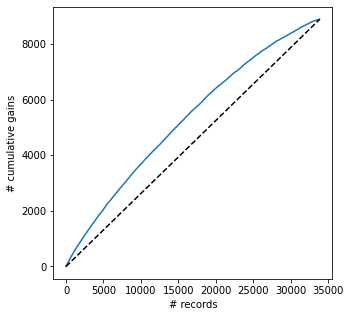

In [ ]:
knn_train = knn_train.sort_values(by=['p(1)'], ascending=False)
# confusion matrix
classificationSummary(knn_train.actual, knn_train.predicted)
gainsChart(knn_train.actual, figsize=[5, 5])

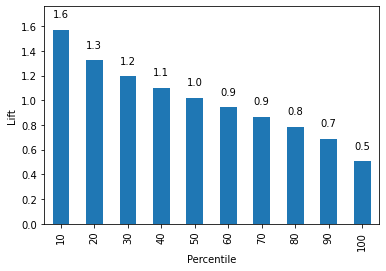

In [ ]:
liftChart(knn_train['p(1)'], title=False)

In [ ]:
knnProb_test=knn.predict_proba(X_test)

In [ ]:
knn_test = pd.DataFrame({'actual': y_test, 
                            'p(0)': [p[0] for p in knnProb_test],
                            'p(1)': [p[1] for p in knnProb_test],
                            'predicted': knn.predict(X_test)})

Confusion Matrix (Accuracy 0.7421)

       Prediction
Actual     0     1
     0 10760    15
     1  3729    11


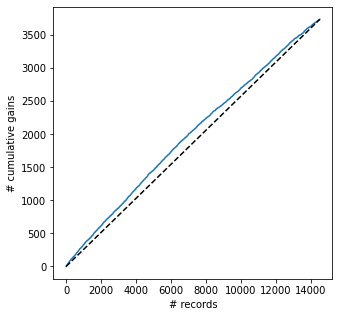

In [ ]:
knn_test = knn_test.sort_values(by=['p(1)'], ascending=False)
# confusion matrix
classificationSummary(knn_test.actual, knn_test.predicted)
gainsChart(knn_test.actual, figsize=[5, 5])

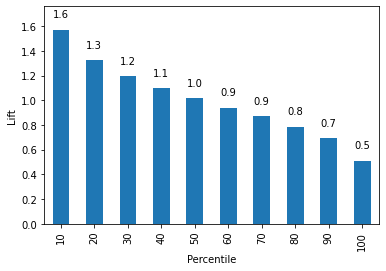

In [ ]:
liftChart(knn_test['p(1)'], title=False)

In [ ]:
print(classification_report(y_train,knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     24983
           1       0.58      0.00      0.01      8885

    accuracy                           0.74     33868
   macro avg       0.66      0.50      0.43     33868
weighted avg       0.70      0.74      0.63     33868



In [ ]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10775
           1       0.42      0.00      0.01      3740

    accuracy                           0.74     14515
   macro avg       0.58      0.50      0.43     14515
weighted avg       0.66      0.74      0.63     14515



In [ ]:
unmitigated_predictor = KNeighborsClassifier(n_neighbors=48)
unmitigated_predictor.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=48, p=2,
                     weights='uniform')

In [ ]:
sweep = GridSearch(KNeighborsClassifier(n_neighbors=48), constraints=DemographicParity(), grid_size=71)
#sweep.fit(X_train, y_train, sensitive_features = data_clean_final.loc[X_train.index, "SEX"])

In [ ]:
sweep.fit()

In [ ]:
predictors = sweep._predictors
predictors

[LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=0.00071, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   

In [ ]:
errors, disparities = [], []
for m in predictors:
    classifier = lambda X: m.predict(X)
    
    error = ErrorRate()
    error.load_data(X_train, pd.Series(y_train), sensitive_features= data_clean_final.loc[X_train.index, "SEX"])
    disparity = DemographicParity()
    disparity.load_data(X_train, pd.Series(y_train), sensitive_features= data_clean_final.loc[X_train.index, "SEX"])
    
    errors.append(error.gamma(classifier)[0])
    disparities.append(disparity.gamma(classifier).max())
    
all_results = pd.DataFrame( {"predictor": predictors, "error": errors, "disparity": disparities})

dominant_models_dict = dict()
base_name_format = "fairness_credit_model"
row_id = 0
for row in all_results.itertuples():
    model_name = base_name_format.format(row_id)
    errors_for_lower_or_eq_disparity = all_results["error"][all_results["disparity"]<=row.disparity]
    if row.error <= errors_for_lower_or_eq_disparity.min():
        dominant_models_dict[model_name] = row.predictor
    row_id = row_id + 1

In [ ]:
predictions_dominant = {"fairness_model_unmitigated": unmitigated_predictor.predict(X_test)}
models_dominant = {"fairness_model_unmitigated": unmitigated_predictor}
for name, predictor in dominant_models_dict.items():
    value = predictor.predict(X_test)
    predictions_dominant[name] = value
    models_dominant[name] = predictor

In [ ]:
FairlearnDashboard(sensitive_features = data_clean_final.loc[X_test.index, "SEX"], 
                   sensitive_feature_names=['SEX'],
                   y_true=y_test.tolist(),
                   y_pred=predictions_dominant)

FairlearnWidget(value={'true_y': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0…

In [ ]:
from azureml.core import Workspace, Experiment, Model

ws = Workspace.from_config()
ws.get_details()

UserErrorException: ignored

In [ ]:
import joblib

os.makedirs('models', exist_ok=True)
def register_model(name, model):
    print("Registering ", name)
    model_path = "models/{0}.pkl".format(name)
    joblib.dump(value=model, filename=model_path)
    registered_model = Model.register(model_path=model_path,
                                      model_name=name,
                                      workspace=ws)
    print("Registered ", registered_model.id)
    return registered_model.id

model_name_id_mapping = dict()
for name, model in models_dominant.items():
    m_id = register_model(name, model)
    model_name_id_mapping[name] = m_id

Registering  fairness_model_unmitigated
Registering model fairness_model_unmitigated
Registered  fairness_model_unmitigated:2
Registering  fairness_credit_model
Registering model fairness_credit_model
Registered  fairness_credit_model:3


In [ ]:
predictions_dominant_ids = dict()
for name, y_pred in predictions_dominant.items():
    predictions_dominant_ids[model_name_id_mapping[name]] = y_pred

In [ ]:
sf = { 'sex': data_clean_final.loc[X_test.index, "SEX"]}

from fairlearn.metrics._group_metric_set import _create_group_metric_set


dash_dict = _create_group_metric_set(y_true=y_test,
                                     predictions=predictions_dominant_ids,
                                     sensitive_features=sf,
                                     prediction_type='binary_classification')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from azureml.contrib.fairness import upload_dashboard_dictionary, download_dashboard_by_upload_id

In [ ]:
exp = Experiment(ws, "Test_Fairlearn_GridSearch_FairnessModel")
print(exp)

run = exp.start_logging()
try:
    dashboard_title = "Dominant Models from GridSearch"
    upload_id = upload_dashboard_dictionary(run,
                                            dash_dict,
                                            dashboard_name=dashboard_title)
    print("\nUploaded to id: {0}\n".format(upload_id))

    downloaded_dict = download_dashboard_by_upload_id(run, upload_id)
finally:
    run.complete()

Experiment(Name: Test_Fairlearn_GridSearch_FairnessModel,
Workspace: April_18_ML_Project)


INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_dashboard_validation.py:Starting validation of dashboard dictionary
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_dashboard_validation.py:Validation of dashboard dictionary successful
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Validating model ids exist
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Checking fairness_credit_model:3
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Checking fairness_model_unmitigated:2
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_azureml_validation.py:Validation of model ids complete
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Uploading y_true
INFO:azureml.FairnessArtifactClient:Uploading to azureml.fairness/dashboard.metrics/0ad9431e-0656-490b-a385-ea6487cb5


Uploaded to id: 0ad9431e-0656-490b-a385-ea6487cb5e0b



INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Populating y_true
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0ad9431e-0656-490b-a385-ea6487cb5e0b/y_true/62ce2f8f-48b8-475a-8607-0fafcfdca3d7.json
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Populating y_pred
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0ad9431e-0656-490b-a385-ea6487cb5e0b/y_pred/62233a5a-ae68-4130-ab45-2b4ac0a85421.json
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0ad9431e-0656-490b-a385-ea6487cb5e0b/y_pred/0538c908-a803-4e16-a6a5-51e35597ef28.json
INFO:/usr/local/lib/python3.7/dist-packages/azureml/contrib/fairness/_fairness_client.py:Populating sensitive features
INFO:azureml.FairnessArtifactClient:Downloading from azureml.fairness/dashboard.metrics/0ad9431e-0656-490b-a385-ea6487cb5e0b/sensitive_features_c

In [ ]:
print(dash_dict == downloaded_dict)

True


## Classification Tree

In [ ]:
######Classification Tree##################
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [ ]:
tree = DecisionTreeClassifier()
tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
param_dist = {"max_depth": [3, None],
              "min_samples_leaf": np.arange(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
tree_cv = GridSearchCV(tree, param_dist, cv=5) 

In [ ]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Best score is 0.7376579648494903


In [ ]:

tree = DecisionTreeClassifier(criterion= 'gini',max_depth= 3,min_samples_leaf= 8)

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

In [ ]:
treeProb_train=tree.predict_proba(X_train)

In [ ]:
tree_train = pd.DataFrame({'actual': y_train, 
                            'p(0)': [p[0] for p in treeProb_train],
                            'p(1)': [p[1] for p in treeProb_train],
                            'predicted': tree.predict(X_train)})

Confusion Matrix (Accuracy 0.7377)

       Prediction
Actual     0     1
     0 24983     0
     1  8885     0


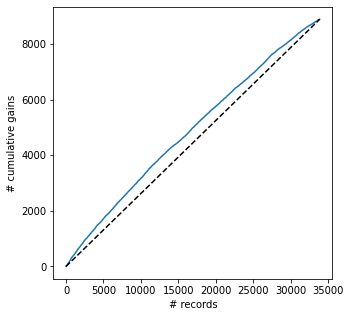

In [ ]:
tree_train = tree_train.sort_values(by=['p(1)'], ascending=False)
# confusion matrix
classificationSummary(tree_train.actual, tree_train.predicted)
gainsChart(tree_train.actual, figsize=[5, 5])

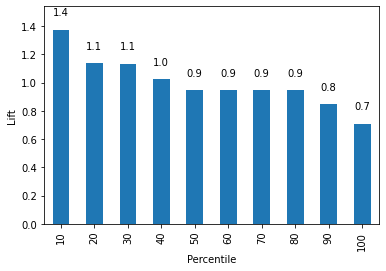

In [ ]:
liftChart(tree_train['p(1)'], title=False)


## Decision Tree

In [ ]:
treeProb_test=tree.predict_proba(X_test)
tree_test = pd.DataFrame({'actual': y_test, 
                            'p(0)': [p[0] for p in treeProb_test],
                            'p(1)': [p[1] for p in treeProb_test],
                            'predicted': tree.predict(X_test)})

Confusion Matrix (Accuracy 0.7423)

       Prediction
Actual     0     1
     0 10775     0
     1  3740     0


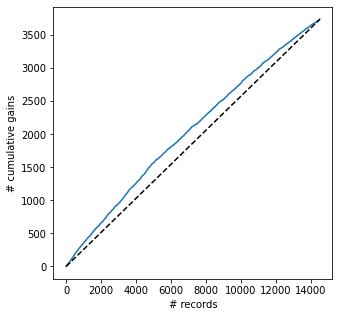

In [ ]:
tree_test = tree_test.sort_values(by=['p(1)'], ascending=False)
# confusion matrix
classificationSummary(tree_test.actual, tree_test.predicted)
gainsChart(tree_test.actual, figsize=[5, 5])

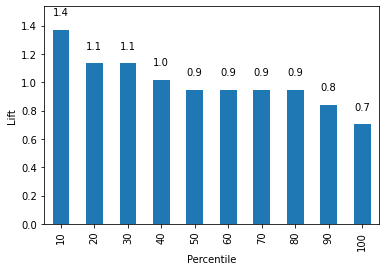

In [ ]:
liftChart(tree_test['p(1)'], title=False)

In [ ]:
print(classification_report(y_train,tree.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     24983
           1       0.00      0.00      0.00      8885

    accuracy                           0.74     33868
   macro avg       0.37      0.50      0.42     33868
weighted avg       0.54      0.74      0.63     33868



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10775
           1       0.00      0.00      0.00      3740

    accuracy                           0.74     14515
   macro avg       0.37      0.50      0.43     14515
weighted avg       0.55      0.74      0.63     14515



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ensemble model

In [ ]:
total_valid = pd.DataFrame({'actual': y_test, 
                         'predicted_Logistic': logreg.predict(X_test),
                         'predicted_Knn': knn.predict(X_test),
                        'predicted_Tree': tree.predict(X_test)})

In [ ]:
total_valid['Mode']=0

In [ ]:
total_valid

,actual,predicted_Logistic,predicted_Knn,predicted_Tree,Mode
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
14510,0,0,0,0,0
14511,1,0,0,0,0
14512,0,0,0,0,0
14513,0,0,0,0,0


In [ ]:
mode=total_valid.mode(axis=1)

In [ ]:
total_valid['Mode']=mode

In [ ]:
total_valid['Mode'].sum()

0

In [ ]:
probability_valid = pd.DataFrame({
                            'LogitRegression: p(1)': [p[1] for p in logreg_pred_test],
                            'KnnRegression: p(1)': [p[1] for p in knnProb_test],
                            'TreeRegression: p(1)': [p[1] for p in treeProb_test]
                         })

In [ ]:
mean=probability_valid.mean(axis = 1)

In [ ]:
probability_valid['Mean']=mean

In [ ]:
list_mean=[]

In [ ]:
probability_valid

,LogitRegression: p(1),KnnRegression: p(1),TreeRegression: p(1),Mean
0,0.333936,0.208333,0.357687,0.299986
1,0.245768,0.208333,0.248116,0.234073
2,0.284822,0.291667,0.416209,0.330899
3,0.211265,0.166667,0.160319,0.179417
4,0.287139,0.270833,0.248116,0.268696
...,...,...,...,...
14510,0.274572,0.229167,0.248116,0.250618
14511,0.310638,0.229167,0.297032,0.278946
14512,0.246807,0.187500,0.248116,0.227474
14513,0.288640,0.250000,0.248116,0.262252


In [ ]:
for x in range(0,14515):
    if probability_valid['Mean'].iloc[x]>=0.4:
        list_mean.append(1)
    else:
        list_mean.append(0)

In [ ]:
list_mean= pd.DataFrame(list_mean)

In [ ]:
mean_values=list_mean

In [ ]:
total_valid['Mean']=mean_values

In [ ]:
total_valid

,actual,predicted_Logistic,predicted_Knn,predicted_Tree,Mode,Mean
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
14510,0,0,0,0,0,0
14511,1,0,0,0,0,0
14512,0,0,0,0,0,0
14513,0,0,0,0,0,0


In [ ]:
classificationSummary(total_valid.actual, total_valid.Mean)

Confusion Matrix (Accuracy 0.7417)

       Prediction
Actual     0     1
     0 10754    21
     1  3728    12


In [ ]:
classificationSummary(total_valid.actual, total_valid.Mode)

Confusion Matrix (Accuracy 0.7423)

       Prediction
Actual     0     1
     0 10775     0
     1  3740     0


## Auto ML using Azure


In [ ]:
## The following Microsoft Resource was used in implementing our Auto ML Model
##https://docs.microsoft.com/en-us/azure/machine-learning/how-to-configure-auto-train

In [ ]:
## Auto ML using Azure 
import logging
from matplotlib import pyplot as plt
import pandas as pd
import os
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.automl.core.featurization import FeaturizationConfig
from azureml.core.dataset import Dataset
from azureml.train.automl import AutoMLConfig
from azureml.interpret import ExplanationClient

In [ ]:
## Set up CPU for Auto Learn
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

# Choose a name for your CPU cluster
cpu_cluster_name = "cpu-cluster-4"

# Verify that cluster does not exist already
try:
    compute_target = ComputeTarget(workspace=ws, name=cpu_cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2',
                                                           max_nodes=6)
    compute_target = ComputeTarget.create(ws, cpu_cluster_name, compute_config)

compute_target.wait_for_completion(show_output=True)

Found existing cluster, use it.
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


In [ ]:
## Set up workspace for Azure

ws = Workspace.from_config()

# choose a name for experiment
experiment_name = 'Auto_ML'

experiment=Experiment(ws, experiment_name)


output = {}
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
outputDf = pd.DataFrame(data = output, index = [''])
outputDf.T

,
Subscription ID,883a227b-29ca-4936-abce-7897cd490955
Workspace,Final_Run_May_9
Resource Group,ML_Project
Location,eastus
Experiment Name,Auto_ML


In [ ]:
## Subset Data to run Auto ML

Azure_ML_Data=data_clean_final[['MONTHS_IN_RESIDENCE', 'TOTAL_INCOME_STD', 'OTHER_INCOMES',
                      'QUANT_CARS', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'PRODUCT_1', 'PRODUCT_2',
        'PRODUCT_7', 'FLAG_CREDIT_CARD','RESIDENCE_TYPE_0', 'RESIDENCE_TYPE_1', 'RESIDENCE_TYPE_2',
       'RESIDENCE_TYPE_3', 'RESIDENCE_TYPE_4', 'RESIDENCE_TYPE_5',
       'PAYMENT_DAY_1', 'PAYMENT_DAY_5', 'PAYMENT_DAY_10', 'PAYMENT_DAY_15',
       'PAYMENT_DAY_20', 'PAYMENT_DAY_25', 'MARITAL_STATUS_1',
       'MARITAL_STATUS_2', 'MARITAL_STATUS_3', 'MARITAL_STATUS_4',
       'MARITAL_STATUS_5', 'MARITAL_STATUS_6', 'MARITAL_STATUS_7', 'sao vicente', 'alfenas', 'sao luis', 'salvador', 'manaus',
       'ananindeua', 'curitiba', 'brasilia', 'maua', 'campo grande', 'OCC_0',
       'OCC_1', 'OCC_2', 'OCC_3', 'OCC_4', 'OCC_5', 'TARGET_LABEL']]


In [ ]:
## Split Data into training and testing
from sklearn.model_selection import train_test_split
x_train_azure, x_test_azure = train_test_split(Azure_ML_Data, test_size=0.3, random_state=223)

In [ ]:
## Auto ML initialization
automl_config = AutoMLConfig(task='classification',
                                   primary_metric='AUC_weighted',
                                   experiment_timeout_minutes=30,
                                   blocked_models=['XGBoostClassifier'],
                                   training_data=x_train_azure,
                                   label_column_name= 'TARGET_LABEL',
                                   n_cross_validations=2)

In [ ]:
## Create Experiment in Auto ML
from azureml.core.experiment import Experiment

ws = Workspace.from_config()

# Choose a name for the experiment and specify the project folder.
experiment_name = 'Auto_ML'


experiment = Experiment(ws, experiment_name)

In [ ]:
## Experiment uploaded to Azure
experiment

Name,Workspace,Report Page,Docs Page
Auto_ML,Final_Run_May_9,Link to Azure Machine Learning studio,Link to Documentation


In [ ]:
## Run output for Auto ML
run = experiment.submit(automl_config, show_output=True)

No run_configuration provided, running on local with default configuration
Running in the active local environment.


Experiment,Id,Type,Status,Details Page,Docs Page
Auto_ML,AutoML_a11ced8a-5e20-4cac-8f7b-dbb5d56a16c6,automl,Preparing,Link to Azure Machine Learning studio,Link to Documentation


Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and all classes are balanced in your training data.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData

****************************************************************************************************

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values

In [ ]:
run.wait_for_completion()

{'endTimeUtc': '2021-05-09T23:45:15.541776Z',
 'inputDatasets': [],
 'logFiles': {},
 'outputDatasets': [],
 'properties': {'AMLSettingsJsonString': '{"path":null,"name":"Auto_ML","subscription_id":"883a227b-29ca-4936-abce-7897cd490955","resource_group":"ML_Project","workspace_name":"Final_Run_May_9","region":"eastus","compute_target":"local","spark_service":null,"azure_service":"local","many_models":false,"pipeline_fetch_max_batch_size":1,"enable_batch_run":false,"enable_run_restructure":false,"start_auxiliary_runs_before_parent_complete":false,"iterations":1000,"primary_metric":"AUC_weighted","task_type":"classification","data_script":null,"test_size":0.0,"validation_size":0.0,"n_cross_validations":2,"y_min":null,"y_max":null,"num_classes":null,"featurization":"auto","_ignore_package_version_incompatibilities":false,"is_timeseries":false,"max_cores_per_iteration":1,"max_concurrent_iterations":1,"iteration_timeout_minutes":null,"mem_in_mb":null,"enforce_time_on_windows":false,"experim

In [ ]:
## Best Model through Auto ML - Voting Ensemble
best_run_customized, fitted_model_customized = run.get_output()

In [ ]:
##Updated featurization summary
custom_featurizer = fitted_model_customized.named_steps['datatransformer']
df = custom_featurizer.get_featurization_summary()
pd.DataFrame(data=df)


,RawFeatureName,TypeDetected,Dropped,EngineeredFeatureCount,Transformations
0,COMPANY,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
1,FLAG_CREDIT_CARD,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
2,FLAG_PROFESSIONAL_PHONE,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
3,MARITAL_STATUS_1,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
4,MARITAL_STATUS_2,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
5,MARITAL_STATUS_3,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
6,MARITAL_STATUS_4,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
7,MARITAL_STATUS_5,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
8,MARITAL_STATUS_6,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]
9,MARITAL_STATUS_7,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder]


In [ ]:
df = custom_featurizer.get_featurization_summary(is_user_friendly=False)
pd.DataFrame(data=df)


,RawFeatureName,TypeDetected,Dropped,EngineeredFeatureCount,Transformations,TransformationParams
0,COMPANY,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder],"{'Transformer1': {'Input': ['COMPANY'], 'TransformationFunction': 'CatImputer', 'Operator': 'Mode', 'FeatureType': 'Categorical', 'ShouldOutput': True, 'TransformationParams': {'copy': True}}, 'Transformer2': {'Input': ['Transformer1'], 'TransformationFunction': 'StringCast', 'Operator': None, 'FeatureType': None, 'ShouldOutput': False, 'TransformationParams': {}}, 'Transformer3': {'Input': ['Transformer2'], 'TransformationFunction': 'LabelEncoder', 'Operator': None, 'FeatureType': None, 'ShouldOutput': True, 'TransformationParams': {'hashing_seed_val': 314489979}}}"
1,FLAG_CREDIT_CARD,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder],"{'Transformer1': {'Input': ['FLAG_CREDIT_CARD'], 'TransformationFunction': 'CatImputer', 'Operator': 'Mode', 'FeatureType': 'Categorical', 'ShouldOutput': True, 'TransformationParams': {'copy': True}}, 'Transformer2': {'Input': ['Transformer1'], 'TransformationFunction': 'StringCast', 'Operator': None, 'FeatureType': None, 'ShouldOutput': False, 'TransformationParams': {}}, 'Transformer3': {'Input': ['Transformer2'], 'TransformationFunction': 'LabelEncoder', 'Operator': None, 'FeatureType': None, 'ShouldOutput': True, 'TransformationParams': {'hashing_seed_val': 314489979}}}"
2,FLAG_PROFESSIONAL_PHONE,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder],"{'Transformer1': {'Input': ['FLAG_PROFESSIONAL_PHONE'], 'TransformationFunction': 'CatImputer', 'Operator': 'Mode', 'FeatureType': 'Categorical', 'ShouldOutput': True, 'TransformationParams': {'copy': True}}, 'Transformer2': {'Input': ['Transformer1'], 'TransformationFunction': 'StringCast', 'Operator': None, 'FeatureType': None, 'ShouldOutput': False, 'TransformationParams': {}}, 'Transformer3': {'Input': ['Transformer2'], 'TransformationFunction': 'LabelEncoder', 'Operator': None, 'FeatureType': None, 'ShouldOutput': True, 'TransformationParams': {'hashing_seed_val': 314489979}}}"
3,MARITAL_STATUS_1,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder],"{'Transformer1': {'Input': ['MARITAL_STATUS_1'], 'TransformationFunction': 'CatImputer', 'Operator': 'Mode', 'FeatureType': 'Categorical', 'ShouldOutput': True, 'TransformationParams': {'copy': True}}, 'Transformer2': {'Input': ['Transformer1'], 'TransformationFunction': 'StringCast', 'Operator': None, 'FeatureType': None, 'ShouldOutput': False, 'TransformationParams': {}}, 'Transformer3': {'Input': ['Transformer2'], 'TransformationFunction': 'LabelEncoder', 'Operator': None, 'FeatureType': None, 'ShouldOutput': True, 'TransformationParams': {'hashing_seed_val': 314489979}}}"
4,MARITAL_STATUS_2,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder],"{'Transformer1': {'Input': ['MARITAL_STATUS_2'], 'TransformationFunction': 'CatImputer', 'Operator': 'Mode', 'FeatureType': 'Categorical', 'ShouldOutput': True, 'TransformationParams': {'copy': True}}, 'Transformer2': {'Input': ['Transformer1'], 'TransformationFunction': 'StringCast', 'Operator': None, 'FeatureType': None, 'ShouldOutput': False, 'TransformationParams': {}}, 'Transformer3': {'Input': ['Transformer2'], 'TransformationFunction': 'LabelEncoder', 'Operator': None, 'FeatureType': None, 'ShouldOutput': True, 'TransformationParams': {'hashing_seed_val': 314489979}}}"
5,MARITAL_STATUS_3,Categorical,No,1,[ModeCatImputer-StringCast-LabelEncoder],"{'Transformer1': {'Input': ['MARITAL_STATUS_3'], 'TransformationFunction': 'CatImputer', 'Operator': 'Mode', 'FeatureType': 'Categorical', 'ShouldOutput': True, 'TransformationParams': {'copy': True}}, 'Transformer2': {'Input': ['Transformer1'], 'TransformationFunction': 'StringCast', 'Operator': None, 'FeatureType': None, 'ShouldOutput': False, 'TransformationParams': {}}, 'Transformer3': {'Input': ['Transformer2'], 'TransformationFunction': 'LabelEncoder', 'Operator': None, 'FeatureType': None, 'ShouldOutput': True, 

In [ ]:
from pprint import pprint

def print_model(model, prefix=""):
    for step in model.steps:
        print(prefix + step[0])
        if hasattr(step[1], 'estimators') and hasattr(step[1], 'weights'):
            pprint({'estimators': list(e[0] for e in step[1].estimators), 'weights': step[1].weights})
            print()
            for estimator in step[1].estimators:
                print_model(estimator[1], estimator[0]+ ' - ')
        elif hasattr(step[1], '_base_learners') and hasattr(step[1], '_meta_learner'):
            print("\nMeta Learner")
            pprint(step[1]._meta_learner)
            print()
            for estimator in step[1]._base_learners:
                print_model(estimator[1], estimator[0]+ ' - ')
        else:
            pprint(step[1].get_params())
            print()   

In [ ]:
## Best Run
best_run, fitted_model = run.get_output()
print(best_run)

Run(Experiment: Auto_ML,
Id: AutoML_a11ced8a-5e20-4cac-8f7b-dbb5d56a16c6_70,
Type: None,
Status: Completed)


In [ ]:
best_run, fitted_model = run.get_output()

In [ ]:
## Best Auto ML model - Voting Ensemble with weights on the different models shown below
##

print_model(fitted_model)

datatransformer
{'enable_dnn': None,
 'enable_feature_sweeping': None,
 'feature_sweeping_config': None,
 'feature_sweeping_timeout': None,
 'featurization_config': None,
 'force_text_dnn': None,
 'is_cross_validation': None,
 'is_onnx_compatible': None,
 'logger': None,
 'observer': None,
 'task': None,
 'working_dir': None}

prefittedsoftvotingclassifier
{'estimators': ['21', '29', '32', '31', '61', '0', '57', '34', '55'],
 'weights': [0.2,
             0.13333333333333333,
             0.06666666666666667,
             0.06666666666666667,
             0.06666666666666667,
             0.06666666666666667,
             0.06666666666666667,
             0.2,
             0.13333333333333333]}

21 - standardscalerwrapper
{'class_name': 'StandardScaler',
 'copy': True,
 'module_name': 'sklearn.preprocessing._data',
 'with_mean': False,
 'with_std': True}

21 - lightgbmclassifier
{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.7922222222222222,
 'importance_type'

In [ ]:
dir(fitted_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_required_parameters',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'memory',
 'named_steps',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'score_samples',
 'set_params',
 'steps',
 'transform',
 'verbose']

In [ ]:
from sklearn.metrics import classification_report
#y_test_azure = x_test_azure.pop("TARGET_LABEL")

y_predict_azure = fitted_model.predict(x_test_azure)
print(classification_report(y_test_azure,y_predict_azure))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10684
           1       0.00      0.00      0.00      3831

    accuracy                           0.74     14515
   macro avg       0.37      0.50      0.42     14515
weighted avg       0.54      0.74      0.62     14515

